In [1]:
import brightway2 as bw

In [2]:
bw.projects.set_current('Dimension reduction')

In [3]:
eidb = bw.Database("ecoinvent 3.6 cutoff")
random_act = eidb.random()
random_act

'electricity voltage transformation from high to medium voltage' (kilowatt hour, CN-CSG, None)

In [4]:
lca = bw.LCA({random_act: 1}, method=('IPCC 2013', 'climate change', 'GWP 100a'))
lca.lci()
lca.lcia()

In [5]:
bio = bw.Database("biosphere3")

In [6]:
from collections import defaultdict
from pyprind import prog_bar
import numpy as np
from scipy import sparse

In [12]:
vectors = {}

In [13]:
for ds in prog_bar(eidb):
    lca.redo_lcia({ds: 1})
    if not lca.score:
        continue
    vectors[lca.activity_dict[ds.key]] = np.ravel((lca.inventory.copy()).sum(axis=1))

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:07:48


In [14]:
len(vectors)

17313

In [15]:
import pandas as pd
df = pd.DataFrame(vectors)

In [16]:
# make the dict as a dataframe
# make the activity id as the index
df_new = df.T.copy()
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076
15248,1.117401e-12,7.633029e-14,8.549791e-12,3.422291e-10,7.513971e-14,6.865469e-10,3.259836e-13,3.911235e-16,1.749731e-13,3.811443e-09,...,0.000018,2.746647e-06,1.607540e-10,1.662867e-10,1.980911e-11,0.000050,7.318315e-07,0.000062,3.162833e-05,1.870613e-07
7350,-5.566718e-14,-3.339429e-15,-2.609570e-14,-4.411731e-11,-3.494940e-15,-2.081376e-12,-1.187685e-14,-8.161399e-18,-8.184882e-15,-6.115289e-10,...,-0.000007,-9.563066e-07,-4.096544e-11,-3.028323e-11,-5.315958e-12,-0.000002,-4.805800e-09,-0.000002,-6.865177e-07,-7.964157e-09
3113,2.000249e-13,2.779753e-14,3.373745e-13,6.097781e-11,2.853326e-14,2.591475e-11,9.184103e-14,7.707328e-16,6.739387e-14,1.729473e-09,...,0.000008,1.226390e-06,4.193456e-10,6.576740e-10,4.644917e-11,0.000142,4.359174e-08,0.000313,2.754628e-06,1.959390e-06
10248,1.708710e-11,8.056718e-13,2.917230e-11,2.369161e-09,8.374829e-13,2.457700e-09,2.650729e-12,4.439483e-13,1.991346e-12,6.549222e-07,...,0.000302,4.285677e-05,4.362297e-09,5.446344e-09,5.152411e-10,0.000699,9.475800e-07,0.002040,4.343446e-05,6.671926e-06
16558,1.968136e-12,1.030417e-13,4.126501e-13,1.407792e-09,1.082695e-13,2.829889e-11,3.550307e-13,1.965291e-16,2.547160e-13,2.852155e-08,...,0.000036,5.193956e-06,8.545060e-10,6.426016e-10,1.105616e-10,0.000022,1.636617e-07,0.000059,2.378755e-05,3.081829e-07


In [17]:
import matplotlib.pyplot as plt

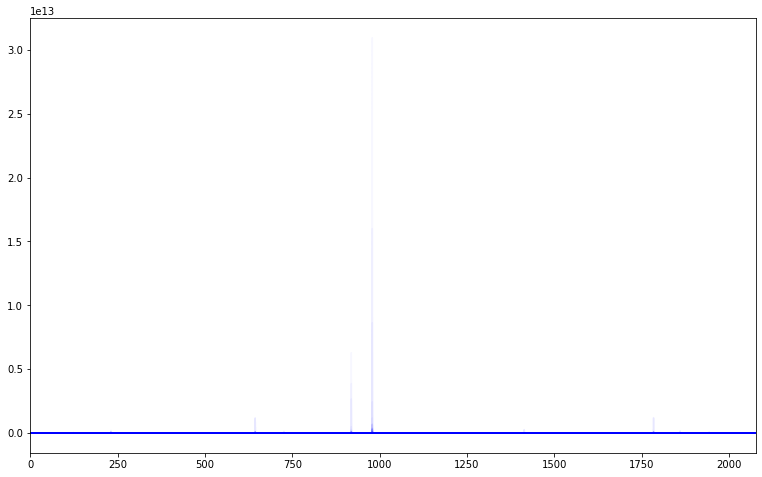

In [18]:
df_new.T.plot(figsize = (13,8), legend = False, 
                    color = 'blue', alpha = 0.03)

In [19]:
df_new.to_csv('all_activities_inventory_all_bioflows.csv')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_data = pd.read_csv('all_activities_inventory_all_bioflows.csv')
df_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076
0,15248,1.117401e-12,7.633029e-14,8.549791e-12,3.422291e-10,7.513971e-14,6.865469e-10,3.259836e-13,3.911235e-16,1.749731e-13,...,0.000018,2.746647e-06,1.607540e-10,1.662867e-10,1.980911e-11,0.000050,7.318315e-07,0.000062,3.162833e-05,1.870613e-07
1,7350,-5.566718e-14,-3.339429e-15,-2.609570e-14,-4.411731e-11,-3.494940e-15,-2.081376e-12,-1.187685e-14,-8.161399e-18,-8.184882e-15,...,-0.000007,-9.563066e-07,-4.096544e-11,-3.028323e-11,-5.315958e-12,-0.000002,-4.805800e-09,-0.000002,-6.865177e-07,-7.964157e-09
2,3113,2.000249e-13,2.779753e-14,3.373745e-13,6.097781e-11,2.853326e-14,2.591475e-11,9.184103e-14,7.707328e-16,6.739387e-14,...,0.000008,1.226390e-06,4.193456e-10,6.576740e-10,4.644917e-11,0.000142,4.359174e-08,0.000313,2.754628e-06,1.959390e-06
3,10248,1.708710e-11,8.056718e-13,2.917230e-11,2.369161e-09,8.374829e-13,2.457700e-09,2.650729e-12,4.439483e-13,1.991346e-12,...,0.000302,4.285677e-05,4.362297e-09,5.446344e-09,5.152411e-10,0.000699,9.475800e-07,0.002040,4.343446e-05,6.671926e-06
4,16558,1.968136e-12,1.030417e-13,4.126501e-13,1.407792e-09,1.082695e-13,2.829889e-11,3.550307e-13,1.965291e-16,2.547160e-13,...,0.000036,5.193956e-06,8.545060e-10,6.426016e-10,1.105616e-10,0.000022,1.636617e-07,0.000059,2.378755e-05,3.081829e-07


In [3]:
df_data = df_data.rename(columns={'Unnamed: 0':'Activity'})
df_data = df_data.set_index('Activity')
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076
Activity,,,,,,,,,,,,,,,,,,,,,
15248,1.117401e-12,7.633029e-14,8.549791e-12,3.422291e-10,7.513971e-14,6.865469e-10,3.259836e-13,3.911235e-16,1.749731e-13,3.811443e-09,...,0.000018,2.746647e-06,1.607540e-10,1.662867e-10,1.980911e-11,0.000050,7.318315e-07,0.000062,3.162833e-05,1.870613e-07
7350,-5.566718e-14,-3.339429e-15,-2.609570e-14,-4.411731e-11,-3.494940e-15,-2.081376e-12,-1.187685e-14,-8.161399e-18,-8.184882e-15,-6.115289e-10,...,-0.000007,-9.563066e-07,-4.096544e-11,-3.028323e-11,-5.315958e-12,-0.000002,-4.805800e-09,-0.000002,-6.865177e-07,-7.964157e-09
3113,2.000249e-13,2.779753e-14,3.373745e-13,6.097781e-11,2.853326e-14,2.591475e-11,9.184103e-14,7.707328e-16,6.739387e-14,1.729473e-09,...,0.000008,1.226390e-06,4.193456e-10,6.576740e-10,4.644917e-11,0.000142,4.359174e-08,0.000313,2.754628e-06,1.959390e-06
10248,1.708710e-11,8.056718e-13,2.917230e-11,2.369161e-09,8.374829e-13,2.457700e-09,2.650729e-12,4.439483e-13,1.991346e-12,6.549222e-07,...,0.000302,4.285677e-05,4.362297e-09,5.446344e-09,5.152411e-10,0.000699,9.475800e-07,0.002040,4.343446e-05,6.671926e-06
16558,1.968136e-12,1.030417e-13,4.126501e-13,1.407792e-09,1.082695e-13,2.829889e-11,3.550307e-13,1.965291e-16,2.547160e-13,2.852155e-08,...,0.000036,5.193956e-06,8.545060e-10,6.426016e-10,1.105616e-10,0.000022,1.636617e-07,0.000059,2.378755e-05,3.081829e-07


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
test = df_data.values.copy().T
x = MinMaxScaler().fit_transform(test)
y = test.T[:2]
y_ = MinMaxScaler().fit_transform(y)
test.shape

(2077, 17313)

In [10]:
sc = MinMaxScaler()
x = df_data.values.copy()
X = sc.fit_transform(x)
df_1 = df_data.copy()
for i in range(X.shape[1]):
    df_1[str(i)]=X.T[i]
df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076
Activity,,,,,,,,,,,,,,,,,,,,,
15248,0.00013,0.00002,0.000009,0.000173,0.00002,0.000038,0.000021,0.000001,0.000019,0.000134,...,0.000134,0.000135,9.265087e-07,0.000001,9.155792e-07,0.000007,0.000057,0.000012,0.000033,0.000009
7350,0.00013,0.00002,0.000009,0.000173,0.00002,0.000038,0.000021,0.000001,0.000019,0.000134,...,0.000134,0.000135,9.265087e-07,0.000001,9.155792e-07,0.000007,0.000057,0.000012,0.000033,0.000009
3113,0.00013,0.00002,0.000009,0.000173,0.00002,0.000038,0.000021,0.000001,0.000019,0.000134,...,0.000134,0.000135,9.265088e-07,0.000001,9.155793e-07,0.000007,0.000057,0.000012,0.000033,0.000009
10248,0.00013,0.00002,0.000009,0.000173,0.00002,0.000038,0.000021,0.000001,0.000019,0.000134,...,0.000134,0.000135,9.265091e-07,0.000001,9.155795e-07,0.000007,0.000057,0.000012,0.000033,0.000009
16558,0.00013,0.00002,0.000009,0.000173,0.00002,0.000038,0.000021,0.000001,0.000019,0.000134,...,0.000134,0.000135,9.265088e-07,0.000001,9.155793e-07,0.000007,0.000057,0.000012,0.000033,0.000009


In [57]:
col_dict = {}
for i in range(len(df_1.columns)):
    col_dict[df_1.columns[i]]=i
df_1 = df_1.rename(columns = col_dict)
drop_list = []
data = df_1.values.copy()
for i in range(data.shape[1]):
    if df_1[i].sum() == 0 and max(df_1[i]) == 0 and min(df_1[i]) == 0: # drop zero columns
        drop_list.append(i)
len(drop_list)

1

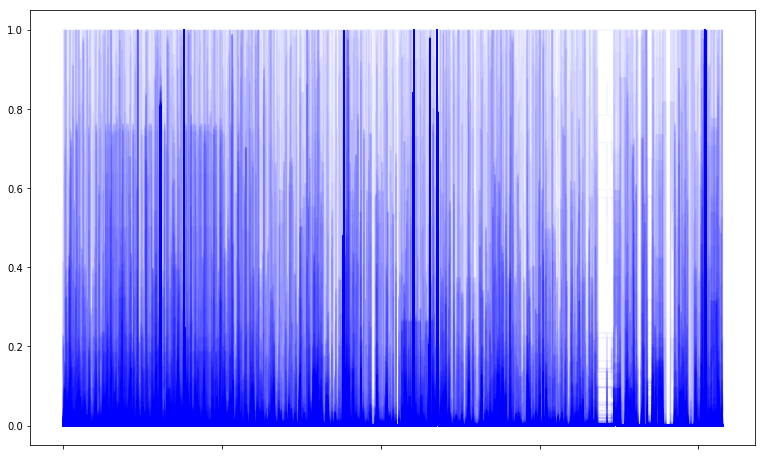

In [11]:
df_1.T.plot(figsize = (13,8), legend = False, 
                    color = 'blue', alpha = 0.03)

In [58]:
df_2 = df_1.drop(columns = drop_list)
df_2.corr()

,0,1,2,3,4,5,6,7,8,9,...,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076
0,1.000000,0.852003,0.666755,0.812904,0.848730,0.746904,0.857176,0.045214,0.845804,0.583389,...,0.890479,0.849759,0.072212,0.081247,0.071190,0.530595,0.541216,0.657833,0.111381,0.117731
1,0.852003,1.000000,0.382744,0.703269,0.999875,0.327522,0.999718,0.032904,0.999547,0.180493,...,0.861880,0.792970,0.095676,0.101974,0.094960,0.419504,0.342556,0.474952,0.076171,0.051529
2,0.666755,0.382744,1.000000,0.669221,0.376006,0.816611,0.385615,0.036477,0.370957,0.454533,...,0.539024,0.569471,0.017403,0.029436,0.016030,0.630212,0.364219,0.913417,0.068085,0.110220
3,0.812904,0.703269,0.669221,1.000000,0.698646,0.542661,0.706341,0.027404,0.694762,0.260007,...,0.882989,0.847547,0.017803,0.027986,0.016655,0.550884,0.339418,0.731777,0.102525,0.073831
4,0.848730,0.999875,0.376006,0.698646,1.000000,0.322071,0.999607,0.032851,0.999686,0.177487,...,0.859471,0.789742,0.092825,0.099005,0.092122,0.412071,0.339579,0.467986,0.075694,0.050564
5,0.746904,0.327522,0.816611,0.542661,0.322071,1.000000,0.336324,0.055616,0.317844,0.743374,...,0.510535,0.527077,0.013592,0.022825,0.012546,0.450031,0.522940,0.666034,0.091546,0.145174
6,0.857176,0.999718,0.385615,0.706341,0.999607,0.336324,1.000000,0.033181,0.999418,0.189896,...,0.867110,0.798402,0.092511,0.099066,0.091770,0.417145,0.345326,0.475978,0.077032,0.052865
7,0.045214,0.032904,0.036477,0.027404,0.032851,0.055616,0.033181,1.000000,0.032798,0.017173,...,0.035040,0.032505,0.002522,0.003063,0.002460,0.013759,0.018378,0.037811,0.013174,0.003076
8,0.845804,0.999547,0.370957,0.694762,0.999686,0.317844,0.999418,0.032798,1.000000,0.175383,...,0.857670,0.786754,0.090736,0.096844,0.090041,0.400809,0.331961,0.461771,0.074695,0.049509
9,0.583389,0.180493,0.454533,0.260007,0.177487,0.743374,0.189896,0.017173,0.175383,1.000000,...,0.268687,0.259086,0.022725,0.026434,0.022303,0.182614,0.498510,0.266050,0.080832,0.144133


In [59]:
# drop some highly correlated features
corr_mtx = df_2.corr()
corrmtx = corr_mtx.values.copy()
corr_i = []
corr_j = []
for i in range(corr_mtx.shape[0]):
    for j in range(corr_mtx.shape[1]):
        if corrmtx[i,j] > 0.99 and i != j:
            print (df_2.columns[i],'-',df_2.columns[j])
            corr_i.append(df_2.columns[i])
            corr_j.append(df_2.columns[j])

0 - 1181
1 - 4
1 - 6
1 - 8
1 - 35
1 - 54
1 - 72
1 - 104
1 - 132
1 - 159
1 - 191
1 - 224
1 - 262
1 - 309
1 - 313
1 - 316
1 - 385
1 - 406
1 - 441
1 - 500
1 - 626
1 - 1182
1 - 1183
1 - 1184
1 - 1185
1 - 1202
1 - 1203
1 - 1260
1 - 1268
1 - 1314
1 - 1316
1 - 1319
1 - 1375
1 - 1388
1 - 1389
1 - 1390
1 - 1431
1 - 1466
1 - 1477
1 - 1536
1 - 1537
1 - 1540
1 - 1611
1 - 1648
1 - 1658
1 - 2040
3 - 14
3 - 61
3 - 83
3 - 98
3 - 117
3 - 122
3 - 138
3 - 152
3 - 167
3 - 172
3 - 198
3 - 221
3 - 249
3 - 251
3 - 268
3 - 269
3 - 328
3 - 349
3 - 394
3 - 416
3 - 444
3 - 447
3 - 489
3 - 511
3 - 514
3 - 531
3 - 543
3 - 574
3 - 576
3 - 624
3 - 1522
3 - 1679
3 - 1680
3 - 1681
3 - 1683
3 - 1684
3 - 1685
3 - 1686
3 - 1687
3 - 1688
3 - 1689
3 - 1690
3 - 1691
3 - 1692
3 - 1693
3 - 1694
3 - 1695
3 - 1696
3 - 1697
3 - 1698
3 - 1699
3 - 1700
3 - 1701
3 - 1702
3 - 1703
3 - 1704
3 - 1705
3 - 1706
3 - 1707
3 - 1708
3 - 1709
3 - 1710
3 - 1711
3 - 1713
3 - 1714
3 - 1715
3 - 1716
3 - 1717
3 - 1718
3 - 1719
3 - 1720
3 - 1721
3

61 - 1715
61 - 1716
61 - 1717
61 - 1718
61 - 1719
61 - 1720
61 - 1721
61 - 1722
61 - 1723
61 - 1724
61 - 1725
61 - 1726
61 - 1728
61 - 1729
61 - 1730
61 - 1731
61 - 1732
61 - 1733
61 - 1734
61 - 1754
61 - 1773
61 - 1776
61 - 1862
61 - 1863
61 - 1877
61 - 1879
61 - 1880
61 - 1884
61 - 1925
61 - 1926
61 - 1929
62 - 28
62 - 36
62 - 49
62 - 60
62 - 70
62 - 94
62 - 96
62 - 108
62 - 109
62 - 118
62 - 121
62 - 146
62 - 147
62 - 199
62 - 206
62 - 208
62 - 215
62 - 217
62 - 233
62 - 256
62 - 279
62 - 281
62 - 282
62 - 283
62 - 287
62 - 322
62 - 325
62 - 366
62 - 395
62 - 415
62 - 429
62 - 434
62 - 440
62 - 449
62 - 451
62 - 467
62 - 490
62 - 513
62 - 555
62 - 600
62 - 618
62 - 619
62 - 1990
63 - 336
63 - 340
63 - 1117
64 - 1415
65 - 67
65 - 338
65 - 412
65 - 493
65 - 509
65 - 1366
65 - 1675
66 - 39
66 - 111
66 - 176
66 - 246
66 - 424
66 - 518
67 - 65
67 - 338
67 - 412
67 - 493
67 - 509
67 - 1366
67 - 1675
68 - 17
68 - 19
68 - 76
68 - 95
68 - 124
68 - 125
68 - 165
68 - 182
68 - 223
68 - 226
68 -

99 - 1538
99 - 1541
99 - 1639
100 - 29
100 - 106
100 - 114
100 - 153
100 - 166
100 - 186
100 - 197
100 - 202
100 - 203
100 - 216
100 - 217
100 - 218
100 - 219
100 - 255
100 - 257
100 - 263
100 - 265
100 - 279
100 - 282
100 - 283
100 - 388
100 - 395
100 - 426
100 - 438
100 - 482
100 - 617
100 - 620
100 - 627
101 - 1114
101 - 1596
102 - 300
103 - 47
104 - 1
104 - 4
104 - 6
104 - 8
104 - 35
104 - 54
104 - 72
104 - 132
104 - 159
104 - 191
104 - 224
104 - 262
104 - 309
104 - 313
104 - 315
104 - 316
104 - 385
104 - 406
104 - 441
104 - 500
104 - 626
104 - 1182
104 - 1183
104 - 1184
104 - 1185
104 - 1202
104 - 1203
104 - 1260
104 - 1268
104 - 1314
104 - 1316
104 - 1319
104 - 1375
104 - 1388
104 - 1389
104 - 1390
104 - 1431
104 - 1466
104 - 1468
104 - 1477
104 - 1536
104 - 1537
104 - 1540
104 - 1611
104 - 1648
104 - 1658
104 - 2040
105 - 25
105 - 44
105 - 82
105 - 136
105 - 143
105 - 145
105 - 157
105 - 158
105 - 164
105 - 171
105 - 173
105 - 174
105 - 188
105 - 201
105 - 204
105 - 220
105 - 25

152 - 1688
152 - 1689
152 - 1690
152 - 1691
152 - 1692
152 - 1693
152 - 1694
152 - 1695
152 - 1696
152 - 1697
152 - 1698
152 - 1699
152 - 1700
152 - 1701
152 - 1702
152 - 1703
152 - 1704
152 - 1705
152 - 1706
152 - 1707
152 - 1708
152 - 1709
152 - 1710
152 - 1711
152 - 1713
152 - 1714
152 - 1715
152 - 1716
152 - 1717
152 - 1718
152 - 1719
152 - 1720
152 - 1721
152 - 1722
152 - 1723
152 - 1724
152 - 1725
152 - 1726
152 - 1727
152 - 1728
152 - 1729
152 - 1730
152 - 1731
152 - 1732
152 - 1733
152 - 1734
152 - 1754
152 - 1773
152 - 1776
152 - 1862
152 - 1863
152 - 1877
152 - 1879
152 - 1880
152 - 1884
152 - 1925
152 - 1926
152 - 1929
153 - 29
153 - 100
153 - 106
153 - 114
153 - 166
153 - 186
153 - 197
153 - 202
153 - 203
153 - 216
153 - 217
153 - 218
153 - 219
153 - 255
153 - 257
153 - 263
153 - 265
153 - 279
153 - 282
153 - 283
153 - 388
153 - 395
153 - 426
153 - 438
153 - 617
153 - 620
153 - 627
154 - 156
154 - 222
154 - 250
154 - 425
154 - 470
154 - 503
154 - 506
155 - 84
155 - 175
155 

205 - 887
205 - 888
205 - 921
205 - 922
205 - 942
205 - 952
205 - 953
205 - 955
205 - 958
205 - 959
205 - 973
205 - 975
205 - 977
205 - 980
205 - 1004
205 - 1024
205 - 1027
205 - 1032
205 - 1036
205 - 1045
205 - 1057
205 - 1067
205 - 1070
205 - 1073
205 - 1076
205 - 1078
205 - 1090
205 - 1092
205 - 1098
205 - 1102
205 - 1121
205 - 1124
205 - 1127
205 - 1130
205 - 1134
205 - 1136
205 - 1145
205 - 1148
205 - 1149
205 - 1154
205 - 1157
205 - 1162
205 - 1164
205 - 1167
205 - 1170
205 - 1173
205 - 1176
205 - 1192
205 - 1201
205 - 1205
205 - 1213
205 - 1217
205 - 1224
205 - 1236
205 - 1241
205 - 1246
205 - 1250
205 - 1255
205 - 1266
205 - 1273
205 - 1286
205 - 1309
205 - 1332
205 - 1361
205 - 1429
205 - 1442
205 - 1444
205 - 1449
205 - 1474
205 - 1478
205 - 1507
205 - 1517
205 - 1551
205 - 1554
205 - 1560
205 - 1573
205 - 1579
205 - 1588
205 - 1605
205 - 1619
205 - 1631
205 - 1642
205 - 1651
205 - 1662
205 - 1668
205 - 1753
205 - 1855
205 - 1941
205 - 1944
206 - 28
206 - 36
206 - 49
206 - 60

251 - 1877
251 - 1879
251 - 1880
251 - 1884
251 - 1925
251 - 1926
251 - 1929
253 - 12
253 - 107
253 - 144
253 - 285
253 - 389
253 - 428
253 - 529
253 - 562
253 - 571
253 - 622
253 - 678
253 - 727
253 - 913
253 - 1137
253 - 1494
253 - 1712
253 - 1928
253 - 1932
253 - 1989
253 - 1992
253 - 1994
253 - 1996
254 - 205
254 - 236
254 - 367
254 - 458
254 - 459
254 - 487
254 - 556
254 - 598
254 - 601
254 - 659
254 - 661
254 - 668
254 - 670
254 - 673
254 - 693
254 - 697
254 - 698
254 - 699
254 - 709
254 - 712
254 - 731
254 - 744
254 - 764
254 - 765
254 - 781
254 - 782
254 - 787
254 - 793
254 - 798
254 - 799
254 - 812
254 - 820
254 - 824
254 - 827
254 - 842
254 - 850
254 - 862
254 - 863
254 - 865
254 - 876
254 - 881
254 - 887
254 - 888
254 - 921
254 - 922
254 - 925
254 - 942
254 - 952
254 - 953
254 - 955
254 - 959
254 - 973
254 - 975
254 - 977
254 - 980
254 - 1004
254 - 1024
254 - 1027
254 - 1032
254 - 1036
254 - 1045
254 - 1057
254 - 1067
254 - 1070
254 - 1073
254 - 1076
254 - 1078
254 - 1090
25

305 - 1339
305 - 1365
305 - 1538
305 - 1541
305 - 1639
306 - 468
308 - 302
309 - 1
309 - 4
309 - 6
309 - 8
309 - 35
309 - 54
309 - 72
309 - 104
309 - 132
309 - 159
309 - 191
309 - 224
309 - 262
309 - 313
309 - 315
309 - 316
309 - 385
309 - 406
309 - 441
309 - 500
309 - 626
309 - 1182
309 - 1183
309 - 1184
309 - 1185
309 - 1202
309 - 1203
309 - 1260
309 - 1268
309 - 1314
309 - 1316
309 - 1319
309 - 1375
309 - 1388
309 - 1389
309 - 1390
309 - 1431
309 - 1466
309 - 1468
309 - 1477
309 - 1536
309 - 1537
309 - 1540
309 - 1611
309 - 1648
309 - 1658
309 - 2040
310 - 17
310 - 19
310 - 68
310 - 76
310 - 95
310 - 124
310 - 125
310 - 165
310 - 182
310 - 223
310 - 226
310 - 326
310 - 332
310 - 339
310 - 492
310 - 539
310 - 583
310 - 631
310 - 637
310 - 710
310 - 830
310 - 833
310 - 840
310 - 841
310 - 885
310 - 908
310 - 912
310 - 925
310 - 969
310 - 976
310 - 985
310 - 1028
310 - 1044
310 - 1046
310 - 1081
310 - 1111
310 - 1156
310 - 1226
310 - 1254
310 - 1288
310 - 1303
310 - 1305
310 - 1417
310

383 - 1547
383 - 1549
383 - 1552
383 - 1553
383 - 1555
383 - 1556
383 - 1564
383 - 1571
383 - 1572
383 - 1587
383 - 1622
383 - 1623
383 - 1640
383 - 1641
383 - 1663
383 - 1664
383 - 1666
383 - 1667
384 - 33
385 - 1
385 - 4
385 - 6
385 - 8
385 - 35
385 - 54
385 - 72
385 - 104
385 - 132
385 - 159
385 - 191
385 - 224
385 - 262
385 - 309
385 - 313
385 - 316
385 - 406
385 - 441
385 - 500
385 - 626
385 - 1182
385 - 1183
385 - 1184
385 - 1185
385 - 1202
385 - 1203
385 - 1260
385 - 1268
385 - 1314
385 - 1316
385 - 1319
385 - 1375
385 - 1388
385 - 1389
385 - 1390
385 - 1431
385 - 1466
385 - 1477
385 - 1536
385 - 1537
385 - 1540
385 - 1611
385 - 1648
385 - 1658
385 - 2040
386 - 25
386 - 44
386 - 82
386 - 105
386 - 136
386 - 143
386 - 145
386 - 157
386 - 158
386 - 164
386 - 171
386 - 173
386 - 174
386 - 188
386 - 201
386 - 204
386 - 220
386 - 258
386 - 272
386 - 275
386 - 276
386 - 277
386 - 294
386 - 320
386 - 323
386 - 387
386 - 403
386 - 408
386 - 409
386 - 417
386 - 431
386 - 436
386 - 446
38

433 - 463
433 - 518
433 - 630
433 - 651
434 - 28
434 - 36
434 - 49
434 - 60
434 - 62
434 - 70
434 - 94
434 - 96
434 - 108
434 - 109
434 - 118
434 - 121
434 - 146
434 - 147
434 - 199
434 - 206
434 - 208
434 - 215
434 - 217
434 - 233
434 - 256
434 - 279
434 - 281
434 - 282
434 - 283
434 - 287
434 - 322
434 - 325
434 - 366
434 - 395
434 - 415
434 - 429
434 - 440
434 - 449
434 - 451
434 - 467
434 - 490
434 - 513
434 - 555
434 - 600
434 - 618
434 - 619
434 - 1990
436 - 25
436 - 44
436 - 82
436 - 105
436 - 136
436 - 143
436 - 145
436 - 157
436 - 158
436 - 164
436 - 171
436 - 173
436 - 174
436 - 188
436 - 201
436 - 204
436 - 220
436 - 258
436 - 272
436 - 275
436 - 276
436 - 277
436 - 294
436 - 320
436 - 323
436 - 386
436 - 387
436 - 403
436 - 408
436 - 409
436 - 417
436 - 431
436 - 446
436 - 452
436 - 460
436 - 464
436 - 481
436 - 497
436 - 501
436 - 530
436 - 533
436 - 1165
436 - 1927
437 - 99
437 - 305
437 - 442
437 - 473
437 - 1259
437 - 1267
437 - 1304
437 - 1339
437 - 1365
437 - 1538
437

480 - 684
480 - 692
480 - 737
480 - 738
480 - 739
480 - 740
480 - 754
480 - 758
480 - 759
480 - 843
480 - 845
480 - 852
480 - 853
480 - 854
480 - 855
480 - 856
480 - 869
480 - 874
480 - 919
480 - 949
480 - 950
480 - 981
480 - 982
480 - 996
480 - 1049
480 - 1050
480 - 1052
480 - 1053
480 - 1054
480 - 1055
480 - 1062
480 - 1064
480 - 1208
480 - 1221
480 - 1225
480 - 1227
480 - 1242
480 - 1262
480 - 1269
480 - 1295
480 - 1296
480 - 1299
480 - 1300
480 - 1301
480 - 1302
480 - 1320
480 - 1327
480 - 1330
480 - 1333
480 - 1334
480 - 1335
480 - 1370
480 - 1413
480 - 1420
480 - 1425
480 - 1433
480 - 1455
480 - 1471
480 - 1475
480 - 1483
480 - 1486
480 - 1490
480 - 1523
480 - 1544
480 - 1557
480 - 1561
480 - 1565
480 - 1574
480 - 1580
480 - 1589
480 - 1590
480 - 1597
480 - 1612
480 - 1614
480 - 1657
480 - 1859
481 - 25
481 - 44
481 - 82
481 - 105
481 - 136
481 - 143
481 - 145
481 - 157
481 - 158
481 - 164
481 - 171
481 - 173
481 - 174
481 - 188
481 - 201
481 - 204
481 - 220
481 - 258
481 - 272
4

530 - 446
530 - 452
530 - 460
530 - 464
530 - 481
530 - 497
530 - 501
530 - 533
530 - 1165
530 - 1927
531 - 3
531 - 14
531 - 83
531 - 98
531 - 117
531 - 122
531 - 138
531 - 152
531 - 170
531 - 172
531 - 198
531 - 221
531 - 249
531 - 251
531 - 268
531 - 269
531 - 328
531 - 349
531 - 394
531 - 416
531 - 444
531 - 447
531 - 489
531 - 505
531 - 511
531 - 514
531 - 574
531 - 576
531 - 624
531 - 1679
531 - 1680
531 - 1681
531 - 1683
531 - 1684
531 - 1685
531 - 1686
531 - 1687
531 - 1688
531 - 1689
531 - 1690
531 - 1691
531 - 1692
531 - 1693
531 - 1694
531 - 1695
531 - 1696
531 - 1697
531 - 1698
531 - 1699
531 - 1700
531 - 1701
531 - 1702
531 - 1703
531 - 1704
531 - 1705
531 - 1706
531 - 1707
531 - 1708
531 - 1709
531 - 1710
531 - 1711
531 - 1713
531 - 1714
531 - 1715
531 - 1716
531 - 1717
531 - 1718
531 - 1719
531 - 1720
531 - 1721
531 - 1722
531 - 1723
531 - 1724
531 - 1725
531 - 1726
531 - 1727
531 - 1728
531 - 1729
531 - 1730
531 - 1731
531 - 1732
531 - 1733
531 - 1734
531 - 1754
531 - 17

617 - 197
617 - 202
617 - 203
617 - 216
617 - 217
617 - 218
617 - 219
617 - 255
617 - 257
617 - 263
617 - 265
617 - 279
617 - 282
617 - 283
617 - 388
617 - 395
617 - 426
617 - 438
617 - 620
617 - 627
618 - 28
618 - 36
618 - 49
618 - 60
618 - 62
618 - 70
618 - 94
618 - 96
618 - 108
618 - 109
618 - 118
618 - 121
618 - 146
618 - 147
618 - 199
618 - 206
618 - 208
618 - 215
618 - 217
618 - 233
618 - 256
618 - 279
618 - 281
618 - 282
618 - 283
618 - 287
618 - 322
618 - 325
618 - 366
618 - 395
618 - 415
618 - 429
618 - 434
618 - 440
618 - 449
618 - 451
618 - 467
618 - 490
618 - 513
618 - 555
618 - 600
618 - 619
618 - 1990
619 - 28
619 - 36
619 - 49
619 - 60
619 - 62
619 - 70
619 - 94
619 - 96
619 - 108
619 - 109
619 - 118
619 - 121
619 - 146
619 - 147
619 - 199
619 - 206
619 - 208
619 - 215
619 - 217
619 - 233
619 - 256
619 - 279
619 - 281
619 - 282
619 - 283
619 - 287
619 - 322
619 - 325
619 - 366
619 - 395
619 - 415
619 - 429
619 - 434
619 - 440
619 - 449
619 - 451
619 - 467
619 - 490
619 -

661 - 1130
661 - 1134
661 - 1136
661 - 1145
661 - 1148
661 - 1149
661 - 1151
661 - 1154
661 - 1157
661 - 1162
661 - 1164
661 - 1167
661 - 1170
661 - 1173
661 - 1176
661 - 1192
661 - 1201
661 - 1205
661 - 1213
661 - 1217
661 - 1224
661 - 1236
661 - 1241
661 - 1246
661 - 1250
661 - 1255
661 - 1266
661 - 1273
661 - 1286
661 - 1309
661 - 1332
661 - 1361
661 - 1429
661 - 1442
661 - 1444
661 - 1449
661 - 1474
661 - 1478
661 - 1507
661 - 1517
661 - 1531
661 - 1551
661 - 1554
661 - 1560
661 - 1573
661 - 1579
661 - 1588
661 - 1605
661 - 1619
661 - 1631
661 - 1642
661 - 1662
661 - 1668
661 - 1753
661 - 1855
661 - 1941
661 - 1944
663 - 76
663 - 128
663 - 227
663 - 359
663 - 714
663 - 726
663 - 771
663 - 773
663 - 818
663 - 823
663 - 870
663 - 897
663 - 935
663 - 962
663 - 965
663 - 967
663 - 972
663 - 1009
663 - 1014
663 - 1025
663 - 1056
663 - 1106
663 - 1212
663 - 1226
663 - 1263
663 - 1265
663 - 1414
663 - 1421
663 - 1424
663 - 1441
663 - 1484
663 - 1528
663 - 1535
663 - 1584
663 - 1626
663 - 

687 - 1475
687 - 1486
687 - 1490
687 - 1523
687 - 1542
687 - 1544
687 - 1550
687 - 1574
687 - 1590
687 - 1597
687 - 1613
687 - 1624
687 - 1627
687 - 1652
687 - 1653
687 - 1654
687 - 1859
687 - 2061
689 - 17
689 - 182
689 - 236
689 - 637
689 - 659
689 - 668
689 - 670
689 - 672
689 - 710
689 - 744
689 - 764
689 - 781
689 - 787
689 - 798
689 - 820
689 - 827
689 - 830
689 - 833
689 - 840
689 - 861
689 - 863
689 - 881
689 - 885
689 - 888
689 - 925
689 - 951
689 - 958
689 - 969
689 - 974
689 - 976
689 - 1001
689 - 1023
689 - 1026
689 - 1028
689 - 1044
689 - 1081
689 - 1223
689 - 1241
689 - 1305
689 - 1417
689 - 1418
689 - 1473
689 - 1497
689 - 1531
689 - 1560
689 - 1563
689 - 1598
689 - 1600
689 - 1618
689 - 1634
689 - 1651
689 - 1944
690 - 89
690 - 97
690 - 213
690 - 330
690 - 407
690 - 422
690 - 635
690 - 636
690 - 675
690 - 677
690 - 681
690 - 687
690 - 692
690 - 705
690 - 708
690 - 718
690 - 722
690 - 724
690 - 738
690 - 739
690 - 740
690 - 741
690 - 742
690 - 752
690 - 754
690 - 756
690

709 - 1619
709 - 1631
709 - 1642
709 - 1662
709 - 1668
709 - 1753
709 - 1855
709 - 1941
709 - 1944
710 - 17
710 - 19
710 - 68
710 - 95
710 - 124
710 - 125
710 - 165
710 - 182
710 - 226
710 - 310
710 - 326
710 - 332
710 - 631
710 - 637
710 - 689
710 - 830
710 - 833
710 - 840
710 - 861
710 - 885
710 - 908
710 - 912
710 - 951
710 - 969
710 - 974
710 - 976
710 - 1001
710 - 1023
710 - 1026
710 - 1028
710 - 1044
710 - 1081
710 - 1226
710 - 1254
710 - 1288
710 - 1303
710 - 1305
710 - 1417
710 - 1418
710 - 1424
710 - 1430
710 - 1473
710 - 1497
710 - 1531
710 - 1563
710 - 1598
710 - 1600
710 - 1618
710 - 1634
710 - 1651
710 - 1674
710 - 1783
710 - 1786
711 - 1082
711 - 1101
712 - 254
712 - 396
712 - 459
712 - 661
712 - 697
712 - 709
712 - 824
712 - 842
712 - 862
712 - 922
712 - 952
712 - 955
712 - 959
712 - 973
712 - 975
712 - 977
712 - 980
712 - 1024
712 - 1027
712 - 1032
712 - 1045
712 - 1057
712 - 1070
712 - 1073
712 - 1076
712 - 1090
712 - 1098
712 - 1102
712 - 1118
712 - 1124
712 - 1130
71

737 - 213
737 - 241
737 - 260
737 - 330
737 - 407
737 - 413
737 - 422
737 - 480
737 - 632
737 - 635
737 - 636
737 - 639
737 - 652
737 - 683
737 - 684
737 - 692
737 - 718
737 - 738
737 - 739
737 - 740
737 - 754
737 - 758
737 - 759
737 - 761
737 - 843
737 - 845
737 - 852
737 - 853
737 - 854
737 - 855
737 - 856
737 - 869
737 - 909
737 - 919
737 - 949
737 - 950
737 - 981
737 - 982
737 - 996
737 - 1006
737 - 1030
737 - 1049
737 - 1050
737 - 1052
737 - 1053
737 - 1054
737 - 1055
737 - 1059
737 - 1062
737 - 1064
737 - 1084
737 - 1088
737 - 1095
737 - 1119
737 - 1122
737 - 1143
737 - 1146
737 - 1171
737 - 1174
737 - 1208
737 - 1221
737 - 1225
737 - 1227
737 - 1242
737 - 1262
737 - 1269
737 - 1295
737 - 1296
737 - 1300
737 - 1301
737 - 1302
737 - 1320
737 - 1327
737 - 1330
737 - 1333
737 - 1334
737 - 1335
737 - 1413
737 - 1420
737 - 1425
737 - 1433
737 - 1455
737 - 1471
737 - 1475
737 - 1483
737 - 1486
737 - 1490
737 - 1523
737 - 1544
737 - 1557
737 - 1561
737 - 1574
737 - 1580
737 - 1589
737 -

756 - 1327
756 - 1330
756 - 1413
756 - 1475
756 - 1486
756 - 1490
756 - 1523
756 - 1542
756 - 1544
756 - 1550
756 - 1574
756 - 1590
756 - 1597
756 - 1613
756 - 1624
756 - 1627
756 - 1652
756 - 1653
756 - 1654
756 - 1859
756 - 2061
757 - 988
757 - 1395
758 - 40
758 - 123
758 - 260
758 - 278
758 - 423
758 - 479
758 - 480
758 - 632
758 - 636
758 - 639
758 - 652
758 - 683
758 - 684
758 - 692
758 - 737
758 - 738
758 - 739
758 - 740
758 - 754
758 - 759
758 - 843
758 - 845
758 - 852
758 - 853
758 - 854
758 - 855
758 - 856
758 - 869
758 - 874
758 - 919
758 - 949
758 - 950
758 - 981
758 - 982
758 - 996
758 - 1049
758 - 1050
758 - 1052
758 - 1053
758 - 1054
758 - 1055
758 - 1062
758 - 1064
758 - 1208
758 - 1221
758 - 1225
758 - 1227
758 - 1242
758 - 1262
758 - 1269
758 - 1295
758 - 1296
758 - 1299
758 - 1300
758 - 1301
758 - 1302
758 - 1320
758 - 1327
758 - 1330
758 - 1333
758 - 1334
758 - 1335
758 - 1370
758 - 1413
758 - 1420
758 - 1425
758 - 1433
758 - 1455
758 - 1471
758 - 1475
758 - 1483
758

789 - 905
789 - 944
789 - 956
789 - 970
789 - 978
789 - 979
789 - 983
789 - 986
789 - 990
789 - 994
789 - 998
789 - 1002
789 - 1006
789 - 1007
789 - 1030
789 - 1033
789 - 1037
789 - 1038
789 - 1041
789 - 1043
789 - 1047
789 - 1049
789 - 1051
789 - 1059
789 - 1122
789 - 1143
789 - 1146
789 - 1171
789 - 1174
789 - 1542
789 - 1550
789 - 1574
789 - 1613
789 - 1624
789 - 1627
789 - 1645
789 - 1652
789 - 1653
789 - 1654
789 - 1859
789 - 2061
790 - 184
790 - 785
790 - 1947
791 - 214
791 - 891
791 - 914
791 - 989
791 - 1384
791 - 1385
791 - 1511
792 - 783
793 - 205
793 - 236
793 - 254
793 - 367
793 - 458
793 - 459
793 - 487
793 - 556
793 - 598
793 - 601
793 - 659
793 - 661
793 - 668
793 - 670
793 - 672
793 - 673
793 - 693
793 - 697
793 - 698
793 - 699
793 - 709
793 - 731
793 - 744
793 - 764
793 - 765
793 - 781
793 - 782
793 - 787
793 - 798
793 - 799
793 - 812
793 - 820
793 - 824
793 - 827
793 - 842
793 - 850
793 - 862
793 - 863
793 - 865
793 - 876
793 - 881
793 - 887
793 - 888
793 - 921
793 - 

827 - 1442
827 - 1444
827 - 1449
827 - 1474
827 - 1478
827 - 1507
827 - 1517
827 - 1531
827 - 1551
827 - 1554
827 - 1560
827 - 1573
827 - 1579
827 - 1588
827 - 1605
827 - 1619
827 - 1631
827 - 1642
827 - 1651
827 - 1662
827 - 1668
827 - 1753
827 - 1855
827 - 1941
827 - 1944
828 - 299
828 - 358
828 - 592
830 - 17
830 - 68
830 - 124
830 - 125
830 - 182
830 - 310
830 - 637
830 - 659
830 - 668
830 - 672
830 - 689
830 - 710
830 - 833
830 - 840
830 - 861
830 - 863
830 - 885
830 - 925
830 - 951
830 - 958
830 - 969
830 - 974
830 - 976
830 - 1001
830 - 1023
830 - 1026
830 - 1028
830 - 1044
830 - 1081
830 - 1223
830 - 1305
830 - 1417
830 - 1418
830 - 1473
830 - 1497
830 - 1531
830 - 1560
830 - 1563
830 - 1598
830 - 1600
830 - 1618
830 - 1634
830 - 1651
833 - 17
833 - 19
833 - 68
833 - 95
833 - 124
833 - 125
833 - 165
833 - 182
833 - 226
833 - 310
833 - 326
833 - 332
833 - 631
833 - 637
833 - 689
833 - 710
833 - 726
833 - 830
833 - 840
833 - 885
833 - 897
833 - 908
833 - 912
833 - 969
833 - 976
8

855 - 1050
855 - 1051
855 - 1052
855 - 1053
855 - 1054
855 - 1055
855 - 1059
855 - 1062
855 - 1064
855 - 1084
855 - 1088
855 - 1119
855 - 1122
855 - 1143
855 - 1146
855 - 1171
855 - 1174
855 - 1208
855 - 1225
855 - 1227
855 - 1242
855 - 1295
855 - 1296
855 - 1300
855 - 1301
855 - 1302
855 - 1327
855 - 1330
855 - 1333
855 - 1334
855 - 1335
855 - 1413
855 - 1425
855 - 1433
855 - 1455
855 - 1471
855 - 1475
855 - 1483
855 - 1486
855 - 1490
855 - 1523
855 - 1542
855 - 1544
855 - 1550
855 - 1557
855 - 1561
855 - 1574
855 - 1580
855 - 1589
855 - 1590
855 - 1597
855 - 1612
855 - 1613
855 - 1614
855 - 1624
855 - 1627
855 - 1652
855 - 1653
855 - 1654
855 - 1657
855 - 1859
855 - 2061
856 - 40
856 - 97
856 - 123
856 - 213
856 - 241
856 - 260
856 - 330
856 - 407
856 - 422
856 - 480
856 - 632
856 - 635
856 - 636
856 - 639
856 - 652
856 - 675
856 - 681
856 - 683
856 - 684
856 - 687
856 - 690
856 - 692
856 - 705
856 - 708
856 - 718
856 - 722
856 - 737
856 - 738
856 - 739
856 - 740
856 - 742
856 - 752


876 - 1241
876 - 1246
876 - 1250
876 - 1255
876 - 1266
876 - 1273
876 - 1286
876 - 1309
876 - 1332
876 - 1361
876 - 1429
876 - 1442
876 - 1444
876 - 1449
876 - 1474
876 - 1478
876 - 1507
876 - 1517
876 - 1551
876 - 1554
876 - 1560
876 - 1573
876 - 1579
876 - 1588
876 - 1605
876 - 1619
876 - 1631
876 - 1642
876 - 1651
876 - 1662
876 - 1668
876 - 1753
876 - 1855
876 - 1941
876 - 1944
877 - 79
877 - 89
877 - 97
877 - 213
877 - 241
877 - 330
877 - 370
877 - 407
877 - 413
877 - 422
877 - 560
877 - 604
877 - 718
877 - 1088
877 - 1119
877 - 1122
877 - 1143
877 - 1146
877 - 1171
877 - 1174
877 - 1235
877 - 1392
877 - 1405
877 - 1606
877 - 1645
878 - 815
878 - 1564
878 - 1572
881 - 205
881 - 236
881 - 254
881 - 367
881 - 458
881 - 459
881 - 487
881 - 556
881 - 598
881 - 601
881 - 659
881 - 661
881 - 668
881 - 670
881 - 672
881 - 673
881 - 689
881 - 693
881 - 697
881 - 698
881 - 699
881 - 709
881 - 731
881 - 744
881 - 764
881 - 765
881 - 781
881 - 782
881 - 787
881 - 793
881 - 798
881 - 799
881 

921 - 812
921 - 820
921 - 824
921 - 827
921 - 842
921 - 850
921 - 862
921 - 863
921 - 865
921 - 876
921 - 881
921 - 887
921 - 888
921 - 922
921 - 942
921 - 952
921 - 953
921 - 955
921 - 958
921 - 959
921 - 973
921 - 975
921 - 977
921 - 980
921 - 1004
921 - 1024
921 - 1027
921 - 1032
921 - 1036
921 - 1045
921 - 1057
921 - 1067
921 - 1070
921 - 1073
921 - 1076
921 - 1078
921 - 1090
921 - 1092
921 - 1098
921 - 1102
921 - 1121
921 - 1124
921 - 1127
921 - 1130
921 - 1134
921 - 1136
921 - 1145
921 - 1148
921 - 1149
921 - 1151
921 - 1154
921 - 1157
921 - 1162
921 - 1164
921 - 1167
921 - 1170
921 - 1173
921 - 1176
921 - 1192
921 - 1201
921 - 1205
921 - 1213
921 - 1217
921 - 1224
921 - 1236
921 - 1241
921 - 1246
921 - 1250
921 - 1255
921 - 1266
921 - 1273
921 - 1286
921 - 1309
921 - 1332
921 - 1361
921 - 1429
921 - 1442
921 - 1444
921 - 1449
921 - 1474
921 - 1478
921 - 1507
921 - 1517
921 - 1551
921 - 1554
921 - 1560
921 - 1573
921 - 1579
921 - 1588
921 - 1605
921 - 1619
921 - 1631
921 - 1642
9

955 - 704
955 - 709
955 - 712
955 - 731
955 - 744
955 - 764
955 - 765
955 - 781
955 - 782
955 - 787
955 - 793
955 - 798
955 - 799
955 - 812
955 - 820
955 - 824
955 - 827
955 - 842
955 - 850
955 - 862
955 - 863
955 - 865
955 - 876
955 - 881
955 - 887
955 - 888
955 - 921
955 - 922
955 - 925
955 - 942
955 - 952
955 - 953
955 - 958
955 - 959
955 - 973
955 - 975
955 - 977
955 - 980
955 - 1004
955 - 1024
955 - 1027
955 - 1032
955 - 1036
955 - 1045
955 - 1057
955 - 1067
955 - 1070
955 - 1073
955 - 1076
955 - 1078
955 - 1090
955 - 1092
955 - 1098
955 - 1102
955 - 1121
955 - 1124
955 - 1127
955 - 1130
955 - 1134
955 - 1136
955 - 1145
955 - 1148
955 - 1149
955 - 1151
955 - 1154
955 - 1157
955 - 1162
955 - 1164
955 - 1167
955 - 1170
955 - 1173
955 - 1176
955 - 1192
955 - 1201
955 - 1205
955 - 1213
955 - 1217
955 - 1224
955 - 1236
955 - 1241
955 - 1246
955 - 1250
955 - 1255
955 - 1266
955 - 1273
955 - 1286
955 - 1309
955 - 1332
955 - 1361
955 - 1429
955 - 1442
955 - 1444
955 - 1449
955 - 1474
955 

979 - 718
979 - 722
979 - 724
979 - 738
979 - 739
979 - 740
979 - 741
979 - 742
979 - 752
979 - 754
979 - 756
979 - 761
979 - 779
979 - 789
979 - 806
979 - 839
979 - 843
979 - 847
979 - 853
979 - 854
979 - 855
979 - 856
979 - 858
979 - 864
979 - 867
979 - 869
979 - 871
979 - 898
979 - 905
979 - 919
979 - 944
979 - 949
979 - 950
979 - 956
979 - 970
979 - 978
979 - 981
979 - 982
979 - 983
979 - 986
979 - 990
979 - 994
979 - 998
979 - 1002
979 - 1006
979 - 1007
979 - 1030
979 - 1033
979 - 1037
979 - 1038
979 - 1041
979 - 1043
979 - 1047
979 - 1049
979 - 1051
979 - 1053
979 - 1054
979 - 1055
979 - 1059
979 - 1062
979 - 1088
979 - 1119
979 - 1122
979 - 1143
979 - 1146
979 - 1171
979 - 1174
979 - 1208
979 - 1242
979 - 1301
979 - 1327
979 - 1330
979 - 1413
979 - 1475
979 - 1486
979 - 1490
979 - 1523
979 - 1542
979 - 1544
979 - 1550
979 - 1574
979 - 1590
979 - 1597
979 - 1613
979 - 1624
979 - 1627
979 - 1652
979 - 1653
979 - 1654
979 - 1859
979 - 2061
980 - 205
980 - 236
980 - 254
980 - 367
98

990 - 978
990 - 979
990 - 981
990 - 982
990 - 983
990 - 986
990 - 994
990 - 998
990 - 1002
990 - 1006
990 - 1007
990 - 1030
990 - 1033
990 - 1037
990 - 1038
990 - 1041
990 - 1043
990 - 1047
990 - 1049
990 - 1051
990 - 1053
990 - 1054
990 - 1055
990 - 1059
990 - 1062
990 - 1088
990 - 1119
990 - 1122
990 - 1143
990 - 1146
990 - 1171
990 - 1174
990 - 1208
990 - 1242
990 - 1301
990 - 1327
990 - 1330
990 - 1413
990 - 1475
990 - 1486
990 - 1490
990 - 1523
990 - 1542
990 - 1544
990 - 1550
990 - 1574
990 - 1590
990 - 1597
990 - 1613
990 - 1624
990 - 1627
990 - 1652
990 - 1653
990 - 1654
990 - 1859
990 - 2061
991 - 112
991 - 669
991 - 682
991 - 691
991 - 695
991 - 715
991 - 723
991 - 763
991 - 817
991 - 899
991 - 903
991 - 911
991 - 920
991 - 957
991 - 963
991 - 999
991 - 1005
991 - 1008
991 - 1031
991 - 1034
991 - 1083
991 - 1180
991 - 1311
991 - 1508
991 - 1602
991 - 1738
991 - 1739
991 - 1740
991 - 1741
991 - 1743
991 - 1745
991 - 1748
991 - 1749
991 - 1750
992 - 1439
992 - 1440
992 - 1519
9

1005 - 899
1005 - 903
1005 - 911
1005 - 920
1005 - 957
1005 - 963
1005 - 991
1005 - 999
1005 - 1008
1005 - 1031
1005 - 1034
1005 - 1083
1005 - 1180
1005 - 1311
1005 - 1508
1005 - 1602
1005 - 1738
1005 - 1739
1005 - 1740
1005 - 1741
1005 - 1743
1005 - 1745
1005 - 1748
1005 - 1749
1005 - 1750
1006 - 89
1006 - 97
1006 - 213
1006 - 330
1006 - 407
1006 - 422
1006 - 635
1006 - 636
1006 - 675
1006 - 677
1006 - 681
1006 - 687
1006 - 690
1006 - 692
1006 - 705
1006 - 708
1006 - 718
1006 - 722
1006 - 724
1006 - 737
1006 - 738
1006 - 739
1006 - 740
1006 - 741
1006 - 742
1006 - 752
1006 - 754
1006 - 756
1006 - 761
1006 - 779
1006 - 789
1006 - 806
1006 - 839
1006 - 843
1006 - 847
1006 - 853
1006 - 854
1006 - 855
1006 - 856
1006 - 858
1006 - 864
1006 - 867
1006 - 869
1006 - 871
1006 - 898
1006 - 905
1006 - 919
1006 - 944
1006 - 949
1006 - 950
1006 - 956
1006 - 970
1006 - 978
1006 - 979
1006 - 981
1006 - 982
1006 - 983
1006 - 986
1006 - 990
1006 - 994
1006 - 998
1006 - 1002
1006 - 1007
1006 - 1030
100

1033 - 956
1033 - 970
1033 - 978
1033 - 979
1033 - 981
1033 - 982
1033 - 983
1033 - 986
1033 - 990
1033 - 994
1033 - 998
1033 - 1002
1033 - 1006
1033 - 1007
1033 - 1030
1033 - 1037
1033 - 1038
1033 - 1041
1033 - 1043
1033 - 1047
1033 - 1049
1033 - 1051
1033 - 1053
1033 - 1054
1033 - 1055
1033 - 1059
1033 - 1062
1033 - 1088
1033 - 1119
1033 - 1122
1033 - 1143
1033 - 1146
1033 - 1171
1033 - 1174
1033 - 1208
1033 - 1242
1033 - 1301
1033 - 1327
1033 - 1330
1033 - 1413
1033 - 1475
1033 - 1486
1033 - 1490
1033 - 1523
1033 - 1542
1033 - 1544
1033 - 1550
1033 - 1574
1033 - 1590
1033 - 1597
1033 - 1613
1033 - 1624
1033 - 1627
1033 - 1652
1033 - 1653
1033 - 1654
1033 - 1859
1033 - 2061
1034 - 669
1034 - 682
1034 - 691
1034 - 695
1034 - 715
1034 - 723
1034 - 763
1034 - 817
1034 - 899
1034 - 903
1034 - 911
1034 - 920
1034 - 957
1034 - 963
1034 - 991
1034 - 999
1034 - 1005
1034 - 1008
1034 - 1031
1034 - 1083
1034 - 1180
1034 - 1311
1034 - 1508
1034 - 1602
1034 - 1738
1034 - 1739
1034 - 1740
1034 - 

1051 - 675
1051 - 677
1051 - 681
1051 - 687
1051 - 690
1051 - 692
1051 - 705
1051 - 708
1051 - 718
1051 - 722
1051 - 724
1051 - 738
1051 - 739
1051 - 740
1051 - 741
1051 - 742
1051 - 752
1051 - 754
1051 - 756
1051 - 761
1051 - 779
1051 - 789
1051 - 806
1051 - 839
1051 - 843
1051 - 847
1051 - 853
1051 - 854
1051 - 855
1051 - 856
1051 - 858
1051 - 864
1051 - 867
1051 - 869
1051 - 871
1051 - 898
1051 - 905
1051 - 919
1051 - 944
1051 - 949
1051 - 950
1051 - 956
1051 - 970
1051 - 978
1051 - 979
1051 - 981
1051 - 982
1051 - 983
1051 - 986
1051 - 990
1051 - 994
1051 - 998
1051 - 1002
1051 - 1006
1051 - 1007
1051 - 1030
1051 - 1033
1051 - 1037
1051 - 1038
1051 - 1041
1051 - 1043
1051 - 1047
1051 - 1049
1051 - 1053
1051 - 1054
1051 - 1055
1051 - 1059
1051 - 1062
1051 - 1088
1051 - 1119
1051 - 1122
1051 - 1143
1051 - 1146
1051 - 1171
1051 - 1174
1051 - 1208
1051 - 1242
1051 - 1301
1051 - 1327
1051 - 1330
1051 - 1413
1051 - 1455
1051 - 1475
1051 - 1486
1051 - 1490
1051 - 1523
1051 - 1542
1051 - 1

1057 - 1148
1057 - 1149
1057 - 1151
1057 - 1154
1057 - 1157
1057 - 1162
1057 - 1164
1057 - 1167
1057 - 1170
1057 - 1173
1057 - 1176
1057 - 1192
1057 - 1201
1057 - 1205
1057 - 1213
1057 - 1217
1057 - 1224
1057 - 1236
1057 - 1241
1057 - 1246
1057 - 1250
1057 - 1255
1057 - 1266
1057 - 1273
1057 - 1286
1057 - 1309
1057 - 1332
1057 - 1361
1057 - 1429
1057 - 1442
1057 - 1444
1057 - 1449
1057 - 1474
1057 - 1478
1057 - 1507
1057 - 1517
1057 - 1531
1057 - 1551
1057 - 1554
1057 - 1560
1057 - 1573
1057 - 1579
1057 - 1588
1057 - 1605
1057 - 1619
1057 - 1631
1057 - 1642
1057 - 1651
1057 - 1662
1057 - 1668
1057 - 1753
1057 - 1855
1057 - 1941
1057 - 1944
1059 - 89
1059 - 97
1059 - 213
1059 - 330
1059 - 407
1059 - 422
1059 - 635
1059 - 636
1059 - 675
1059 - 677
1059 - 681
1059 - 687
1059 - 690
1059 - 692
1059 - 705
1059 - 708
1059 - 718
1059 - 722
1059 - 724
1059 - 737
1059 - 738
1059 - 739
1059 - 740
1059 - 741
1059 - 742
1059 - 752
1059 - 754
1059 - 756
1059 - 761
1059 - 779
1059 - 789
1059 - 806
10

1073 - 1309
1073 - 1332
1073 - 1361
1073 - 1429
1073 - 1442
1073 - 1444
1073 - 1449
1073 - 1474
1073 - 1478
1073 - 1507
1073 - 1517
1073 - 1551
1073 - 1554
1073 - 1573
1073 - 1579
1073 - 1588
1073 - 1605
1073 - 1619
1073 - 1631
1073 - 1642
1073 - 1662
1073 - 1668
1073 - 1753
1073 - 1855
1073 - 1941
1073 - 1944
1075 - 1066
1075 - 1072
1075 - 1080
1075 - 1089
1075 - 1093
1075 - 1107
1075 - 1113
1075 - 1120
1075 - 1123
1075 - 1144
1075 - 1147
1075 - 1158
1075 - 1161
1076 - 205
1076 - 236
1076 - 254
1076 - 367
1076 - 458
1076 - 459
1076 - 487
1076 - 556
1076 - 598
1076 - 601
1076 - 659
1076 - 661
1076 - 668
1076 - 670
1076 - 672
1076 - 673
1076 - 693
1076 - 697
1076 - 698
1076 - 699
1076 - 709
1076 - 712
1076 - 731
1076 - 744
1076 - 764
1076 - 765
1076 - 781
1076 - 782
1076 - 787
1076 - 793
1076 - 798
1076 - 799
1076 - 812
1076 - 820
1076 - 824
1076 - 827
1076 - 842
1076 - 850
1076 - 862
1076 - 863
1076 - 865
1076 - 876
1076 - 881
1076 - 887
1076 - 888
1076 - 921
1076 - 922
1076 - 942
1076

1092 - 1176
1092 - 1192
1092 - 1201
1092 - 1205
1092 - 1213
1092 - 1217
1092 - 1224
1092 - 1236
1092 - 1241
1092 - 1246
1092 - 1250
1092 - 1255
1092 - 1266
1092 - 1273
1092 - 1286
1092 - 1309
1092 - 1332
1092 - 1361
1092 - 1429
1092 - 1442
1092 - 1444
1092 - 1449
1092 - 1474
1092 - 1478
1092 - 1507
1092 - 1517
1092 - 1551
1092 - 1554
1092 - 1573
1092 - 1579
1092 - 1588
1092 - 1605
1092 - 1619
1092 - 1631
1092 - 1642
1092 - 1662
1092 - 1668
1092 - 1753
1092 - 1855
1092 - 1941
1092 - 1944
1093 - 1066
1093 - 1072
1093 - 1075
1093 - 1080
1093 - 1089
1093 - 1107
1093 - 1113
1093 - 1120
1093 - 1123
1093 - 1144
1093 - 1147
1093 - 1158
1093 - 1161
1094 - 1159
1095 - 58
1095 - 79
1095 - 89
1095 - 97
1095 - 213
1095 - 241
1095 - 330
1095 - 407
1095 - 413
1095 - 422
1095 - 635
1095 - 652
1095 - 737
1095 - 982
1095 - 1065
1095 - 1071
1095 - 1084
1095 - 1088
1095 - 1100
1095 - 1119
1095 - 1122
1095 - 1131
1095 - 1143
1095 - 1146
1095 - 1152
1095 - 1171
1095 - 1174
1095 - 1177
1095 - 1453
1096 - 212

1131 - 1084
1131 - 1095
1131 - 1100
1131 - 1152
1131 - 1177
1131 - 1453
1131 - 1595
1132 - 212
1132 - 264
1132 - 795
1132 - 1085
1132 - 1096
1132 - 1116
1132 - 2007
1132 - 2008
1133 - 1105
1133 - 1111
1133 - 1156
1134 - 205
1134 - 236
1134 - 254
1134 - 367
1134 - 458
1134 - 459
1134 - 487
1134 - 556
1134 - 598
1134 - 601
1134 - 659
1134 - 661
1134 - 668
1134 - 670
1134 - 673
1134 - 693
1134 - 697
1134 - 698
1134 - 699
1134 - 709
1134 - 712
1134 - 731
1134 - 744
1134 - 764
1134 - 765
1134 - 781
1134 - 782
1134 - 787
1134 - 793
1134 - 798
1134 - 799
1134 - 812
1134 - 820
1134 - 824
1134 - 827
1134 - 842
1134 - 850
1134 - 862
1134 - 863
1134 - 865
1134 - 876
1134 - 881
1134 - 887
1134 - 888
1134 - 921
1134 - 922
1134 - 925
1134 - 942
1134 - 952
1134 - 953
1134 - 955
1134 - 959
1134 - 973
1134 - 975
1134 - 977
1134 - 980
1134 - 1004
1134 - 1024
1134 - 1027
1134 - 1032
1134 - 1036
1134 - 1045
1134 - 1057
1134 - 1067
1134 - 1070
1134 - 1073
1134 - 1076
1134 - 1078
1134 - 1090
1134 - 1092
113

1156 - 1111
1156 - 1133
1156 - 1233
1156 - 1303
1156 - 1305
1157 - 205
1157 - 236
1157 - 254
1157 - 367
1157 - 458
1157 - 459
1157 - 487
1157 - 556
1157 - 598
1157 - 601
1157 - 659
1157 - 661
1157 - 668
1157 - 670
1157 - 672
1157 - 673
1157 - 693
1157 - 697
1157 - 698
1157 - 699
1157 - 709
1157 - 712
1157 - 731
1157 - 744
1157 - 764
1157 - 765
1157 - 781
1157 - 782
1157 - 787
1157 - 793
1157 - 798
1157 - 799
1157 - 812
1157 - 820
1157 - 824
1157 - 827
1157 - 842
1157 - 850
1157 - 862
1157 - 863
1157 - 865
1157 - 876
1157 - 881
1157 - 887
1157 - 888
1157 - 921
1157 - 922
1157 - 942
1157 - 952
1157 - 953
1157 - 955
1157 - 958
1157 - 959
1157 - 973
1157 - 975
1157 - 977
1157 - 980
1157 - 1004
1157 - 1024
1157 - 1027
1157 - 1032
1157 - 1036
1157 - 1045
1157 - 1057
1157 - 1067
1157 - 1070
1157 - 1073
1157 - 1076
1157 - 1078
1157 - 1090
1157 - 1092
1157 - 1098
1157 - 1102
1157 - 1121
1157 - 1124
1157 - 1127
1157 - 1130
1157 - 1134
1157 - 1136
1157 - 1145
1157 - 1148
1157 - 1149
1157 - 1151
1

1171 - 998
1171 - 1002
1171 - 1006
1171 - 1007
1171 - 1030
1171 - 1033
1171 - 1037
1171 - 1038
1171 - 1041
1171 - 1043
1171 - 1047
1171 - 1049
1171 - 1051
1171 - 1053
1171 - 1054
1171 - 1055
1171 - 1059
1171 - 1062
1171 - 1071
1171 - 1084
1171 - 1088
1171 - 1095
1171 - 1100
1171 - 1119
1171 - 1122
1171 - 1143
1171 - 1146
1171 - 1152
1171 - 1174
1171 - 1177
1171 - 1208
1171 - 1242
1171 - 1295
1171 - 1301
1171 - 1302
1171 - 1327
1171 - 1330
1171 - 1413
1171 - 1425
1171 - 1433
1171 - 1455
1171 - 1475
1171 - 1486
1171 - 1490
1171 - 1523
1171 - 1542
1171 - 1544
1171 - 1550
1171 - 1574
1171 - 1589
1171 - 1590
1171 - 1597
1171 - 1612
1171 - 1613
1171 - 1624
1171 - 1627
1171 - 1652
1171 - 1653
1171 - 1654
1171 - 1657
1171 - 1859
1171 - 2061
1173 - 205
1173 - 236
1173 - 254
1173 - 367
1173 - 458
1173 - 459
1173 - 487
1173 - 556
1173 - 598
1173 - 601
1173 - 659
1173 - 661
1173 - 668
1173 - 670
1173 - 672
1173 - 673
1173 - 693
1173 - 697
1173 - 698
1173 - 699
1173 - 709
1173 - 712
1173 - 731
1173

1192 - 1631
1192 - 1642
1192 - 1651
1192 - 1662
1192 - 1668
1192 - 1753
1192 - 1855
1192 - 1941
1192 - 1944
1193 - 383
1193 - 643
1193 - 767
1193 - 1140
1193 - 1160
1193 - 1195
1193 - 1196
1193 - 1239
1193 - 1240
1193 - 1244
1193 - 1248
1193 - 1249
1193 - 1271
1193 - 1292
1193 - 1293
1193 - 1297
1193 - 1298
1193 - 1398
1193 - 1399
1193 - 1400
1193 - 1401
1193 - 1404
1193 - 1422
1193 - 1452
1193 - 1505
1193 - 1509
1193 - 1515
1193 - 1546
1193 - 1547
1193 - 1552
1193 - 1553
1193 - 1555
1193 - 1556
1193 - 1564
1193 - 1571
1193 - 1572
1193 - 1587
1193 - 1622
1193 - 1623
1193 - 1640
1193 - 1641
1193 - 1663
1193 - 1664
1193 - 1666
1193 - 1667
1195 - 383
1195 - 643
1195 - 767
1195 - 1140
1195 - 1160
1195 - 1193
1195 - 1196
1195 - 1239
1195 - 1240
1195 - 1244
1195 - 1248
1195 - 1249
1195 - 1271
1195 - 1292
1195 - 1293
1195 - 1297
1195 - 1298
1195 - 1398
1195 - 1399
1195 - 1400
1195 - 1401
1195 - 1404
1195 - 1422
1195 - 1452
1195 - 1505
1195 - 1509
1195 - 1515
1195 - 1546
1195 - 1547
1195 - 155

1213 - 1224
1213 - 1236
1213 - 1241
1213 - 1246
1213 - 1250
1213 - 1255
1213 - 1266
1213 - 1273
1213 - 1286
1213 - 1309
1213 - 1332
1213 - 1361
1213 - 1429
1213 - 1442
1213 - 1444
1213 - 1449
1213 - 1474
1213 - 1478
1213 - 1507
1213 - 1517
1213 - 1531
1213 - 1551
1213 - 1554
1213 - 1560
1213 - 1573
1213 - 1579
1213 - 1588
1213 - 1605
1213 - 1619
1213 - 1631
1213 - 1642
1213 - 1651
1213 - 1662
1213 - 1668
1213 - 1753
1213 - 1855
1213 - 1941
1213 - 1944
1216 - 86
1216 - 1021
1216 - 1039
1216 - 1125
1217 - 205
1217 - 236
1217 - 254
1217 - 367
1217 - 458
1217 - 459
1217 - 487
1217 - 556
1217 - 598
1217 - 601
1217 - 659
1217 - 661
1217 - 668
1217 - 670
1217 - 672
1217 - 673
1217 - 693
1217 - 697
1217 - 698
1217 - 699
1217 - 709
1217 - 731
1217 - 744
1217 - 764
1217 - 765
1217 - 781
1217 - 782
1217 - 787
1217 - 793
1217 - 798
1217 - 799
1217 - 812
1217 - 820
1217 - 824
1217 - 827
1217 - 842
1217 - 850
1217 - 861
1217 - 862
1217 - 863
1217 - 865
1217 - 876
1217 - 881
1217 - 887
1217 - 888
121

1236 - 1651
1236 - 1662
1236 - 1668
1236 - 1753
1236 - 1855
1236 - 1941
1236 - 1944
1237 - 80
1237 - 333
1237 - 369
1237 - 603
1237 - 644
1237 - 931
1237 - 1445
1237 - 1446
1237 - 1450
1237 - 1451
1237 - 1484
1237 - 1518
1237 - 1529
1237 - 1576
1237 - 1585
1237 - 1784
1237 - 1860
1238 - 1209
1238 - 1328
1239 - 383
1239 - 643
1239 - 767
1239 - 1140
1239 - 1160
1239 - 1193
1239 - 1195
1239 - 1196
1239 - 1240
1239 - 1244
1239 - 1248
1239 - 1249
1239 - 1271
1239 - 1292
1239 - 1293
1239 - 1297
1239 - 1298
1239 - 1398
1239 - 1399
1239 - 1400
1239 - 1401
1239 - 1404
1239 - 1422
1239 - 1452
1239 - 1505
1239 - 1509
1239 - 1515
1239 - 1546
1239 - 1547
1239 - 1552
1239 - 1553
1239 - 1555
1239 - 1556
1239 - 1564
1239 - 1571
1239 - 1572
1239 - 1587
1239 - 1622
1239 - 1623
1239 - 1640
1239 - 1641
1239 - 1663
1239 - 1664
1239 - 1666
1239 - 1667
1240 - 383
1240 - 643
1240 - 767
1240 - 1140
1240 - 1160
1240 - 1193
1240 - 1195
1240 - 1196
1240 - 1239
1240 - 1244
1240 - 1248
1240 - 1249
1240 - 1271
1240 

1254 - 332
1254 - 631
1254 - 637
1254 - 710
1254 - 726
1254 - 833
1254 - 840
1254 - 885
1254 - 897
1254 - 908
1254 - 912
1254 - 969
1254 - 972
1254 - 976
1254 - 1025
1254 - 1028
1254 - 1044
1254 - 1081
1254 - 1226
1254 - 1288
1254 - 1303
1254 - 1417
1254 - 1418
1254 - 1424
1254 - 1430
1254 - 1473
1254 - 1497
1254 - 1563
1254 - 1598
1254 - 1600
1254 - 1618
1254 - 1674
1254 - 1783
1254 - 1786
1255 - 205
1255 - 236
1255 - 254
1255 - 367
1255 - 458
1255 - 459
1255 - 487
1255 - 556
1255 - 598
1255 - 601
1255 - 659
1255 - 661
1255 - 668
1255 - 670
1255 - 672
1255 - 673
1255 - 693
1255 - 697
1255 - 698
1255 - 699
1255 - 709
1255 - 731
1255 - 744
1255 - 764
1255 - 765
1255 - 781
1255 - 782
1255 - 787
1255 - 793
1255 - 798
1255 - 799
1255 - 812
1255 - 820
1255 - 824
1255 - 827
1255 - 842
1255 - 850
1255 - 861
1255 - 862
1255 - 863
1255 - 865
1255 - 876
1255 - 881
1255 - 887
1255 - 888
1255 - 921
1255 - 922
1255 - 942
1255 - 951
1255 - 952
1255 - 953
1255 - 955
1255 - 958
1255 - 959
1255 - 973
1

1273 - 942
1273 - 951
1273 - 952
1273 - 953
1273 - 955
1273 - 958
1273 - 959
1273 - 973
1273 - 974
1273 - 975
1273 - 977
1273 - 980
1273 - 1001
1273 - 1004
1273 - 1023
1273 - 1024
1273 - 1027
1273 - 1032
1273 - 1036
1273 - 1045
1273 - 1057
1273 - 1067
1273 - 1070
1273 - 1073
1273 - 1076
1273 - 1078
1273 - 1090
1273 - 1092
1273 - 1098
1273 - 1102
1273 - 1121
1273 - 1124
1273 - 1127
1273 - 1130
1273 - 1134
1273 - 1136
1273 - 1145
1273 - 1148
1273 - 1149
1273 - 1154
1273 - 1157
1273 - 1162
1273 - 1164
1273 - 1167
1273 - 1170
1273 - 1173
1273 - 1176
1273 - 1192
1273 - 1201
1273 - 1205
1273 - 1213
1273 - 1217
1273 - 1224
1273 - 1236
1273 - 1241
1273 - 1246
1273 - 1250
1273 - 1255
1273 - 1266
1273 - 1286
1273 - 1309
1273 - 1332
1273 - 1361
1273 - 1429
1273 - 1442
1273 - 1444
1273 - 1449
1273 - 1474
1273 - 1478
1273 - 1507
1273 - 1517
1273 - 1531
1273 - 1551
1273 - 1554
1273 - 1560
1273 - 1573
1273 - 1579
1273 - 1588
1273 - 1605
1273 - 1619
1273 - 1631
1273 - 1642
1273 - 1651
1273 - 1662
1273

1316 - 1183
1316 - 1184
1316 - 1185
1316 - 1202
1316 - 1203
1316 - 1260
1316 - 1268
1316 - 1314
1316 - 1319
1316 - 1375
1316 - 1388
1316 - 1389
1316 - 1390
1316 - 1431
1316 - 1466
1316 - 1477
1316 - 1536
1316 - 1537
1316 - 1540
1316 - 1611
1316 - 1648
1316 - 1658
1316 - 2040
1317 - 9
1317 - 22
1317 - 41
1317 - 178
1317 - 181
1317 - 189
1317 - 190
1317 - 225
1317 - 247
1317 - 314
1317 - 317
1317 - 476
1317 - 495
1317 - 1206
1317 - 1467
1317 - 2058
1317 - 2059
1318 - 745
1318 - 788
1318 - 797
1318 - 800
1318 - 890
1318 - 900
1318 - 1368
1318 - 1373
1318 - 1462
1318 - 1857
1318 - 2023
1318 - 2024
1319 - 1
1319 - 4
1319 - 6
1319 - 8
1319 - 35
1319 - 54
1319 - 72
1319 - 104
1319 - 132
1319 - 159
1319 - 191
1319 - 224
1319 - 262
1319 - 309
1319 - 313
1319 - 315
1319 - 316
1319 - 385
1319 - 406
1319 - 441
1319 - 500
1319 - 626
1319 - 1182
1319 - 1183
1319 - 1184
1319 - 1185
1319 - 1202
1319 - 1203
1319 - 1260
1319 - 1268
1319 - 1314
1319 - 1316
1319 - 1375
1319 - 1388
1319 - 1389
1319 - 1390


1335 - 855
1335 - 856
1335 - 869
1335 - 874
1335 - 919
1335 - 949
1335 - 950
1335 - 981
1335 - 982
1335 - 996
1335 - 1049
1335 - 1050
1335 - 1052
1335 - 1053
1335 - 1054
1335 - 1055
1335 - 1062
1335 - 1064
1335 - 1208
1335 - 1221
1335 - 1225
1335 - 1227
1335 - 1242
1335 - 1262
1335 - 1269
1335 - 1295
1335 - 1296
1335 - 1299
1335 - 1300
1335 - 1301
1335 - 1302
1335 - 1320
1335 - 1327
1335 - 1330
1335 - 1333
1335 - 1334
1335 - 1370
1335 - 1413
1335 - 1420
1335 - 1425
1335 - 1433
1335 - 1455
1335 - 1471
1335 - 1475
1335 - 1483
1335 - 1486
1335 - 1490
1335 - 1523
1335 - 1544
1335 - 1557
1335 - 1561
1335 - 1565
1335 - 1574
1335 - 1580
1335 - 1589
1335 - 1590
1335 - 1597
1335 - 1612
1335 - 1614
1335 - 1657
1335 - 1859
1336 - 1256
1337 - 80
1337 - 369
1337 - 410
1337 - 593
1337 - 603
1337 - 644
1337 - 707
1337 - 771
1337 - 773
1337 - 821
1337 - 823
1337 - 965
1337 - 1042
1337 - 1056
1337 - 1099
1337 - 1106
1337 - 1108
1337 - 1212
1337 - 1257
1337 - 1261
1337 - 1306
1337 - 1325
1337 - 1352
133

1420 - 684
1420 - 692
1420 - 737
1420 - 738
1420 - 739
1420 - 740
1420 - 754
1420 - 758
1420 - 759
1420 - 845
1420 - 852
1420 - 856
1420 - 869
1420 - 874
1420 - 981
1420 - 982
1420 - 996
1420 - 1050
1420 - 1052
1420 - 1054
1420 - 1062
1420 - 1064
1420 - 1221
1420 - 1225
1420 - 1227
1420 - 1242
1420 - 1262
1420 - 1269
1420 - 1295
1420 - 1296
1420 - 1299
1420 - 1300
1420 - 1302
1420 - 1320
1420 - 1327
1420 - 1333
1420 - 1334
1420 - 1335
1420 - 1370
1420 - 1425
1420 - 1433
1420 - 1455
1420 - 1471
1420 - 1475
1420 - 1483
1420 - 1485
1420 - 1557
1420 - 1561
1420 - 1565
1420 - 1580
1420 - 1589
1420 - 1592
1420 - 1593
1420 - 1612
1420 - 1614
1420 - 1657
1421 - 128
1421 - 227
1421 - 359
1421 - 593
1421 - 663
1421 - 714
1421 - 726
1421 - 771
1421 - 773
1421 - 818
1421 - 823
1421 - 870
1421 - 897
1421 - 935
1421 - 962
1421 - 965
1421 - 967
1421 - 972
1421 - 1009
1421 - 1014
1421 - 1025
1421 - 1042
1421 - 1056
1421 - 1106
1421 - 1212
1421 - 1261
1421 - 1263
1421 - 1265
1421 - 1352
1421 - 1414
142

1455 - 40
1455 - 97
1455 - 123
1455 - 213
1455 - 241
1455 - 260
1455 - 330
1455 - 407
1455 - 422
1455 - 480
1455 - 632
1455 - 635
1455 - 636
1455 - 639
1455 - 652
1455 - 681
1455 - 683
1455 - 684
1455 - 690
1455 - 692
1455 - 718
1455 - 722
1455 - 737
1455 - 738
1455 - 739
1455 - 740
1455 - 754
1455 - 758
1455 - 759
1455 - 761
1455 - 843
1455 - 845
1455 - 847
1455 - 852
1455 - 853
1455 - 854
1455 - 855
1455 - 856
1455 - 858
1455 - 864
1455 - 869
1455 - 871
1455 - 905
1455 - 919
1455 - 944
1455 - 949
1455 - 950
1455 - 978
1455 - 981
1455 - 982
1455 - 996
1455 - 1006
1455 - 1030
1455 - 1049
1455 - 1050
1455 - 1051
1455 - 1052
1455 - 1053
1455 - 1054
1455 - 1055
1455 - 1059
1455 - 1062
1455 - 1064
1455 - 1084
1455 - 1088
1455 - 1119
1455 - 1122
1455 - 1143
1455 - 1146
1455 - 1171
1455 - 1174
1455 - 1208
1455 - 1221
1455 - 1225
1455 - 1227
1455 - 1242
1455 - 1262
1455 - 1269
1455 - 1295
1455 - 1296
1455 - 1300
1455 - 1301
1455 - 1302
1455 - 1320
1455 - 1327
1455 - 1330
1455 - 1333
1455 - 13

1505 - 1240
1505 - 1244
1505 - 1248
1505 - 1249
1505 - 1271
1505 - 1292
1505 - 1293
1505 - 1297
1505 - 1298
1505 - 1398
1505 - 1399
1505 - 1400
1505 - 1401
1505 - 1404
1505 - 1422
1505 - 1452
1505 - 1509
1505 - 1515
1505 - 1546
1505 - 1547
1505 - 1552
1505 - 1553
1505 - 1555
1505 - 1556
1505 - 1564
1505 - 1571
1505 - 1572
1505 - 1587
1505 - 1622
1505 - 1623
1505 - 1640
1505 - 1641
1505 - 1663
1505 - 1664
1505 - 1666
1505 - 1667
1506 - 593
1506 - 707
1506 - 771
1506 - 821
1506 - 823
1506 - 1042
1506 - 1056
1506 - 1099
1506 - 1106
1506 - 1108
1506 - 1212
1506 - 1257
1506 - 1261
1506 - 1337
1506 - 1352
1506 - 1363
1506 - 1414
1506 - 1529
1506 - 1562
1506 - 1637
1506 - 1673
1506 - 1858
1507 - 205
1507 - 236
1507 - 254
1507 - 367
1507 - 458
1507 - 459
1507 - 487
1507 - 556
1507 - 598
1507 - 601
1507 - 659
1507 - 661
1507 - 668
1507 - 670
1507 - 672
1507 - 673
1507 - 693
1507 - 697
1507 - 698
1507 - 699
1507 - 709
1507 - 731
1507 - 744
1507 - 764
1507 - 765
1507 - 781
1507 - 782
1507 - 787
1

1531 - 830
1531 - 849
1531 - 861
1531 - 863
1531 - 881
1531 - 885
1531 - 887
1531 - 888
1531 - 922
1531 - 925
1531 - 951
1531 - 955
1531 - 958
1531 - 969
1531 - 974
1531 - 976
1531 - 1001
1531 - 1017
1531 - 1023
1531 - 1026
1531 - 1028
1531 - 1036
1531 - 1044
1531 - 1046
1531 - 1057
1531 - 1192
1531 - 1201
1531 - 1205
1531 - 1213
1531 - 1217
1531 - 1223
1531 - 1224
1531 - 1233
1531 - 1241
1531 - 1246
1531 - 1250
1531 - 1255
1531 - 1266
1531 - 1273
1531 - 1286
1531 - 1305
1531 - 1309
1531 - 1332
1531 - 1361
1531 - 1418
1531 - 1429
1531 - 1442
1531 - 1444
1531 - 1449
1531 - 1473
1531 - 1474
1531 - 1478
1531 - 1497
1531 - 1507
1531 - 1517
1531 - 1551
1531 - 1554
1531 - 1560
1531 - 1563
1531 - 1573
1531 - 1579
1531 - 1588
1531 - 1598
1531 - 1605
1531 - 1618
1531 - 1619
1531 - 1631
1531 - 1634
1531 - 1642
1531 - 1651
1531 - 1662
1531 - 1668
1531 - 1795
1531 - 1798
1531 - 1944
1533 - 992
1533 - 1439
1533 - 1440
1533 - 1519
1533 - 1526
1533 - 1527
1533 - 1534
1533 - 1548
1533 - 1621
1533 - 16

1551 - 1057
1551 - 1067
1551 - 1070
1551 - 1073
1551 - 1076
1551 - 1078
1551 - 1090
1551 - 1092
1551 - 1098
1551 - 1102
1551 - 1121
1551 - 1124
1551 - 1127
1551 - 1130
1551 - 1134
1551 - 1136
1551 - 1145
1551 - 1148
1551 - 1149
1551 - 1154
1551 - 1157
1551 - 1162
1551 - 1164
1551 - 1167
1551 - 1170
1551 - 1173
1551 - 1176
1551 - 1192
1551 - 1201
1551 - 1205
1551 - 1213
1551 - 1217
1551 - 1224
1551 - 1236
1551 - 1241
1551 - 1246
1551 - 1250
1551 - 1255
1551 - 1266
1551 - 1273
1551 - 1286
1551 - 1309
1551 - 1332
1551 - 1361
1551 - 1429
1551 - 1442
1551 - 1444
1551 - 1449
1551 - 1474
1551 - 1478
1551 - 1507
1551 - 1517
1551 - 1531
1551 - 1554
1551 - 1560
1551 - 1573
1551 - 1579
1551 - 1588
1551 - 1605
1551 - 1619
1551 - 1631
1551 - 1642
1551 - 1651
1551 - 1662
1551 - 1668
1551 - 1753
1551 - 1855
1551 - 1941
1551 - 1944
1552 - 383
1552 - 643
1552 - 767
1552 - 1140
1552 - 1160
1552 - 1193
1552 - 1195
1552 - 1196
1552 - 1239
1552 - 1240
1552 - 1244
1552 - 1248
1552 - 1249
1552 - 1271
1552 - 

1565 - 874
1565 - 996
1565 - 1050
1565 - 1052
1565 - 1064
1565 - 1221
1565 - 1225
1565 - 1262
1565 - 1269
1565 - 1296
1565 - 1299
1565 - 1300
1565 - 1306
1565 - 1320
1565 - 1333
1565 - 1334
1565 - 1335
1565 - 1420
1565 - 1446
1565 - 1451
1565 - 1471
1565 - 1483
1565 - 1485
1565 - 1518
1565 - 1557
1565 - 1561
1565 - 1576
1565 - 1580
1565 - 1592
1565 - 1593
1565 - 1614
1565 - 1649
1566 - 1109
1566 - 1139
1566 - 1448
1567 - 1211
1567 - 1633
1568 - 537
1569 - 889
1570 - 1435
1570 - 1628
1571 - 383
1571 - 643
1571 - 767
1571 - 1140
1571 - 1160
1571 - 1193
1571 - 1195
1571 - 1196
1571 - 1239
1571 - 1240
1571 - 1244
1571 - 1248
1571 - 1249
1571 - 1271
1571 - 1292
1571 - 1293
1571 - 1297
1571 - 1298
1571 - 1398
1571 - 1399
1571 - 1400
1571 - 1401
1571 - 1404
1571 - 1422
1571 - 1452
1571 - 1505
1571 - 1509
1571 - 1515
1571 - 1546
1571 - 1547
1571 - 1552
1571 - 1553
1571 - 1555
1571 - 1556
1571 - 1564
1571 - 1572
1571 - 1587
1571 - 1622
1571 - 1623
1571 - 1640
1571 - 1641
1571 - 1663
1571 - 1664

1588 - 709
1588 - 731
1588 - 744
1588 - 764
1588 - 765
1588 - 781
1588 - 782
1588 - 787
1588 - 793
1588 - 798
1588 - 799
1588 - 812
1588 - 820
1588 - 824
1588 - 827
1588 - 842
1588 - 850
1588 - 861
1588 - 862
1588 - 863
1588 - 865
1588 - 876
1588 - 881
1588 - 887
1588 - 888
1588 - 921
1588 - 922
1588 - 942
1588 - 951
1588 - 952
1588 - 953
1588 - 955
1588 - 958
1588 - 959
1588 - 973
1588 - 974
1588 - 975
1588 - 977
1588 - 980
1588 - 1001
1588 - 1004
1588 - 1023
1588 - 1024
1588 - 1027
1588 - 1032
1588 - 1036
1588 - 1045
1588 - 1057
1588 - 1067
1588 - 1070
1588 - 1073
1588 - 1076
1588 - 1078
1588 - 1090
1588 - 1092
1588 - 1098
1588 - 1102
1588 - 1121
1588 - 1124
1588 - 1127
1588 - 1130
1588 - 1134
1588 - 1136
1588 - 1145
1588 - 1148
1588 - 1149
1588 - 1154
1588 - 1157
1588 - 1162
1588 - 1164
1588 - 1167
1588 - 1170
1588 - 1173
1588 - 1176
1588 - 1192
1588 - 1201
1588 - 1205
1588 - 1213
1588 - 1217
1588 - 1224
1588 - 1236
1588 - 1241
1588 - 1246
1588 - 1250
1588 - 1255
1588 - 1266
1588 - 

1600 - 830
1600 - 833
1600 - 840
1600 - 861
1600 - 885
1600 - 897
1600 - 908
1600 - 912
1600 - 951
1600 - 969
1600 - 974
1600 - 976
1600 - 1001
1600 - 1023
1600 - 1026
1600 - 1028
1600 - 1044
1600 - 1081
1600 - 1226
1600 - 1254
1600 - 1288
1600 - 1303
1600 - 1305
1600 - 1417
1600 - 1418
1600 - 1424
1600 - 1430
1600 - 1473
1600 - 1497
1600 - 1563
1600 - 1598
1600 - 1618
1600 - 1634
1600 - 1674
1600 - 1783
1600 - 1786
1602 - 112
1602 - 669
1602 - 682
1602 - 691
1602 - 695
1602 - 715
1602 - 723
1602 - 763
1602 - 817
1602 - 899
1602 - 903
1602 - 911
1602 - 920
1602 - 957
1602 - 963
1602 - 991
1602 - 999
1602 - 1005
1602 - 1008
1602 - 1031
1602 - 1034
1602 - 1083
1602 - 1180
1602 - 1311
1602 - 1508
1602 - 1738
1602 - 1739
1602 - 1740
1602 - 1741
1602 - 1743
1602 - 1745
1602 - 1748
1602 - 1749
1602 - 1750
1603 - 13
1603 - 399
1603 - 547
1603 - 671
1603 - 685
1603 - 825
1603 - 844
1603 - 851
1603 - 883
1603 - 947
1603 - 1228
1603 - 1463
1603 - 1591
1605 - 205
1605 - 236
1605 - 254
1605 - 367


1631 - 1605
1631 - 1619
1631 - 1642
1631 - 1651
1631 - 1662
1631 - 1668
1631 - 1753
1631 - 1855
1631 - 1941
1631 - 1944
1632 - 32
1632 - 866
1632 - 1650
1633 - 1211
1633 - 1567
1634 - 17
1634 - 19
1634 - 68
1634 - 95
1634 - 124
1634 - 125
1634 - 182
1634 - 226
1634 - 310
1634 - 326
1634 - 332
1634 - 492
1634 - 539
1634 - 579
1634 - 583
1634 - 631
1634 - 637
1634 - 659
1634 - 667
1634 - 672
1634 - 689
1634 - 710
1634 - 810
1634 - 811
1634 - 830
1634 - 833
1634 - 840
1634 - 841
1634 - 849
1634 - 861
1634 - 885
1634 - 912
1634 - 925
1634 - 951
1634 - 958
1634 - 969
1634 - 974
1634 - 976
1634 - 1001
1634 - 1017
1634 - 1023
1634 - 1026
1634 - 1028
1634 - 1044
1634 - 1046
1634 - 1081
1634 - 1111
1634 - 1223
1634 - 1303
1634 - 1305
1634 - 1417
1634 - 1418
1634 - 1473
1634 - 1497
1634 - 1531
1634 - 1560
1634 - 1563
1634 - 1598
1634 - 1600
1634 - 1618
1634 - 1651
1634 - 1795
1634 - 1798
1634 - 1944
1635 - 1660
1636 - 1362
1637 - 80
1637 - 369
1637 - 410
1637 - 593
1637 - 603
1637 - 644
1637 - 7

1668 - 693
1668 - 697
1668 - 698
1668 - 699
1668 - 709
1668 - 731
1668 - 744
1668 - 764
1668 - 765
1668 - 781
1668 - 782
1668 - 787
1668 - 793
1668 - 798
1668 - 799
1668 - 812
1668 - 820
1668 - 824
1668 - 827
1668 - 842
1668 - 850
1668 - 861
1668 - 862
1668 - 863
1668 - 865
1668 - 876
1668 - 881
1668 - 887
1668 - 888
1668 - 921
1668 - 922
1668 - 942
1668 - 951
1668 - 952
1668 - 953
1668 - 955
1668 - 958
1668 - 959
1668 - 973
1668 - 974
1668 - 975
1668 - 977
1668 - 980
1668 - 1001
1668 - 1004
1668 - 1023
1668 - 1024
1668 - 1027
1668 - 1032
1668 - 1036
1668 - 1045
1668 - 1057
1668 - 1067
1668 - 1070
1668 - 1073
1668 - 1076
1668 - 1078
1668 - 1090
1668 - 1092
1668 - 1098
1668 - 1102
1668 - 1121
1668 - 1124
1668 - 1127
1668 - 1130
1668 - 1134
1668 - 1136
1668 - 1145
1668 - 1148
1668 - 1149
1668 - 1154
1668 - 1157
1668 - 1162
1668 - 1164
1668 - 1167
1668 - 1170
1668 - 1173
1668 - 1176
1668 - 1192
1668 - 1201
1668 - 1205
1668 - 1213
1668 - 1217
1668 - 1224
1668 - 1236
1668 - 1241
1668 - 1246

1691 - 1880
1691 - 1884
1691 - 1925
1691 - 1926
1691 - 1929
1692 - 3
1692 - 14
1692 - 61
1692 - 83
1692 - 98
1692 - 117
1692 - 122
1692 - 138
1692 - 152
1692 - 172
1692 - 198
1692 - 221
1692 - 249
1692 - 251
1692 - 268
1692 - 269
1692 - 328
1692 - 349
1692 - 394
1692 - 416
1692 - 444
1692 - 447
1692 - 489
1692 - 511
1692 - 514
1692 - 531
1692 - 574
1692 - 576
1692 - 624
1692 - 1679
1692 - 1680
1692 - 1681
1692 - 1683
1692 - 1684
1692 - 1685
1692 - 1686
1692 - 1687
1692 - 1688
1692 - 1689
1692 - 1690
1692 - 1691
1692 - 1693
1692 - 1694
1692 - 1695
1692 - 1696
1692 - 1697
1692 - 1698
1692 - 1699
1692 - 1700
1692 - 1701
1692 - 1702
1692 - 1703
1692 - 1704
1692 - 1705
1692 - 1706
1692 - 1707
1692 - 1708
1692 - 1709
1692 - 1710
1692 - 1711
1692 - 1713
1692 - 1714
1692 - 1715
1692 - 1716
1692 - 1717
1692 - 1718
1692 - 1719
1692 - 1720
1692 - 1721
1692 - 1722
1692 - 1723
1692 - 1724
1692 - 1725
1692 - 1726
1692 - 1727
1692 - 1728
1692 - 1729
1692 - 1730
1692 - 1731
1692 - 1732
1692 - 1733
169

1700 - 1730
1700 - 1731
1700 - 1732
1700 - 1733
1700 - 1734
1700 - 1754
1700 - 1773
1700 - 1776
1700 - 1862
1700 - 1863
1700 - 1877
1700 - 1879
1700 - 1880
1700 - 1884
1700 - 1925
1700 - 1926
1700 - 1929
1701 - 3
1701 - 14
1701 - 61
1701 - 83
1701 - 98
1701 - 117
1701 - 122
1701 - 138
1701 - 152
1701 - 172
1701 - 198
1701 - 221
1701 - 249
1701 - 251
1701 - 268
1701 - 269
1701 - 328
1701 - 349
1701 - 394
1701 - 416
1701 - 444
1701 - 447
1701 - 489
1701 - 511
1701 - 514
1701 - 531
1701 - 574
1701 - 576
1701 - 624
1701 - 1679
1701 - 1680
1701 - 1681
1701 - 1683
1701 - 1684
1701 - 1685
1701 - 1686
1701 - 1687
1701 - 1688
1701 - 1689
1701 - 1690
1701 - 1691
1701 - 1692
1701 - 1693
1701 - 1694
1701 - 1695
1701 - 1696
1701 - 1697
1701 - 1698
1701 - 1699
1701 - 1700
1701 - 1702
1701 - 1703
1701 - 1704
1701 - 1705
1701 - 1706
1701 - 1707
1701 - 1708
1701 - 1709
1701 - 1710
1701 - 1711
1701 - 1713
1701 - 1714
1701 - 1715
1701 - 1716
1701 - 1717
1701 - 1718
1701 - 1719
1701 - 1720
1701 - 1721
170

1709 - 1717
1709 - 1718
1709 - 1719
1709 - 1720
1709 - 1721
1709 - 1722
1709 - 1723
1709 - 1724
1709 - 1725
1709 - 1726
1709 - 1727
1709 - 1728
1709 - 1729
1709 - 1730
1709 - 1731
1709 - 1732
1709 - 1733
1709 - 1734
1709 - 1754
1709 - 1773
1709 - 1776
1709 - 1862
1709 - 1863
1709 - 1877
1709 - 1879
1709 - 1880
1709 - 1884
1709 - 1925
1709 - 1926
1709 - 1929
1710 - 3
1710 - 14
1710 - 61
1710 - 83
1710 - 98
1710 - 117
1710 - 122
1710 - 138
1710 - 152
1710 - 172
1710 - 198
1710 - 221
1710 - 249
1710 - 251
1710 - 268
1710 - 269
1710 - 328
1710 - 349
1710 - 394
1710 - 416
1710 - 444
1710 - 447
1710 - 489
1710 - 511
1710 - 514
1710 - 531
1710 - 574
1710 - 576
1710 - 624
1710 - 1679
1710 - 1680
1710 - 1681
1710 - 1683
1710 - 1684
1710 - 1685
1710 - 1686
1710 - 1687
1710 - 1688
1710 - 1689
1710 - 1690
1710 - 1691
1710 - 1692
1710 - 1693
1710 - 1694
1710 - 1695
1710 - 1696
1710 - 1697
1710 - 1698
1710 - 1699
1710 - 1700
1710 - 1701
1710 - 1702
1710 - 1703
1710 - 1704
1710 - 1705
1710 - 1706
171

1719 - 1679
1719 - 1680
1719 - 1681
1719 - 1683
1719 - 1684
1719 - 1685
1719 - 1686
1719 - 1687
1719 - 1688
1719 - 1689
1719 - 1690
1719 - 1691
1719 - 1692
1719 - 1693
1719 - 1694
1719 - 1695
1719 - 1696
1719 - 1697
1719 - 1698
1719 - 1699
1719 - 1700
1719 - 1701
1719 - 1702
1719 - 1703
1719 - 1704
1719 - 1705
1719 - 1706
1719 - 1707
1719 - 1708
1719 - 1709
1719 - 1710
1719 - 1711
1719 - 1713
1719 - 1714
1719 - 1715
1719 - 1716
1719 - 1717
1719 - 1718
1719 - 1720
1719 - 1721
1719 - 1722
1719 - 1723
1719 - 1724
1719 - 1725
1719 - 1726
1719 - 1727
1719 - 1728
1719 - 1729
1719 - 1730
1719 - 1731
1719 - 1732
1719 - 1733
1719 - 1734
1719 - 1754
1719 - 1773
1719 - 1776
1719 - 1862
1719 - 1863
1719 - 1877
1719 - 1879
1719 - 1880
1719 - 1884
1719 - 1925
1719 - 1926
1719 - 1929
1720 - 3
1720 - 14
1720 - 61
1720 - 83
1720 - 98
1720 - 117
1720 - 122
1720 - 138
1720 - 152
1720 - 172
1720 - 198
1720 - 221
1720 - 249
1720 - 251
1720 - 268
1720 - 269
1720 - 328
1720 - 349
1720 - 394
1720 - 416
1720 -

1728 - 328
1728 - 349
1728 - 394
1728 - 416
1728 - 444
1728 - 447
1728 - 489
1728 - 511
1728 - 514
1728 - 531
1728 - 574
1728 - 576
1728 - 624
1728 - 1679
1728 - 1680
1728 - 1681
1728 - 1683
1728 - 1684
1728 - 1685
1728 - 1686
1728 - 1687
1728 - 1688
1728 - 1689
1728 - 1690
1728 - 1691
1728 - 1692
1728 - 1693
1728 - 1694
1728 - 1695
1728 - 1696
1728 - 1697
1728 - 1698
1728 - 1699
1728 - 1700
1728 - 1701
1728 - 1702
1728 - 1703
1728 - 1704
1728 - 1705
1728 - 1706
1728 - 1707
1728 - 1708
1728 - 1709
1728 - 1710
1728 - 1711
1728 - 1713
1728 - 1714
1728 - 1715
1728 - 1716
1728 - 1717
1728 - 1718
1728 - 1719
1728 - 1720
1728 - 1721
1728 - 1722
1728 - 1723
1728 - 1724
1728 - 1725
1728 - 1726
1728 - 1727
1728 - 1729
1728 - 1730
1728 - 1731
1728 - 1732
1728 - 1733
1728 - 1734
1728 - 1754
1728 - 1773
1728 - 1776
1728 - 1862
1728 - 1863
1728 - 1877
1728 - 1879
1728 - 1880
1728 - 1884
1728 - 1925
1728 - 1926
1728 - 1929
1729 - 3
1729 - 14
1729 - 61
1729 - 83
1729 - 98
1729 - 117
1729 - 122
1729 -

1743 - 1031
1743 - 1034
1743 - 1083
1743 - 1180
1743 - 1311
1743 - 1508
1743 - 1602
1743 - 1738
1743 - 1739
1743 - 1740
1743 - 1741
1743 - 1745
1743 - 1748
1743 - 1749
1743 - 1750
1744 - 5
1744 - 335
1744 - 390
1744 - 1735
1744 - 1737
1744 - 1742
1744 - 1746
1744 - 1751
1744 - 1752
1744 - 1787
1744 - 1788
1744 - 1789
1745 - 112
1745 - 669
1745 - 682
1745 - 691
1745 - 695
1745 - 715
1745 - 723
1745 - 763
1745 - 817
1745 - 899
1745 - 903
1745 - 911
1745 - 920
1745 - 957
1745 - 963
1745 - 991
1745 - 999
1745 - 1005
1745 - 1008
1745 - 1031
1745 - 1034
1745 - 1083
1745 - 1180
1745 - 1311
1745 - 1508
1745 - 1602
1745 - 1738
1745 - 1739
1745 - 1740
1745 - 1741
1745 - 1743
1745 - 1748
1745 - 1749
1745 - 1750
1746 - 5
1746 - 335
1746 - 390
1746 - 1735
1746 - 1737
1746 - 1742
1746 - 1744
1746 - 1751
1746 - 1752
1746 - 1787
1746 - 1788
1746 - 1789
1748 - 112
1748 - 669
1748 - 682
1748 - 691
1748 - 695
1748 - 715
1748 - 723
1748 - 763
1748 - 817
1748 - 899
1748 - 903
1748 - 911
1748 - 920
1748 - 9

1846 - 597
1846 - 660
1846 - 1665
1846 - 1840
1846 - 1841
1846 - 1842
1846 - 1843
1846 - 1844
1846 - 1845
1846 - 1847
1846 - 1848
1846 - 1849
1846 - 1850
1846 - 1851
1846 - 1852
1846 - 1853
1846 - 1854
1847 - 139
1847 - 187
1847 - 209
1847 - 363
1847 - 365
1847 - 418
1847 - 597
1847 - 660
1847 - 1665
1847 - 1840
1847 - 1841
1847 - 1842
1847 - 1843
1847 - 1844
1847 - 1845
1847 - 1846
1847 - 1848
1847 - 1849
1847 - 1850
1847 - 1851
1847 - 1852
1847 - 1853
1847 - 1854
1848 - 139
1848 - 187
1848 - 209
1848 - 363
1848 - 365
1848 - 418
1848 - 597
1848 - 660
1848 - 1665
1848 - 1840
1848 - 1841
1848 - 1842
1848 - 1843
1848 - 1844
1848 - 1845
1848 - 1846
1848 - 1847
1848 - 1849
1848 - 1850
1848 - 1851
1848 - 1852
1848 - 1853
1848 - 1854
1849 - 139
1849 - 187
1849 - 209
1849 - 363
1849 - 365
1849 - 418
1849 - 597
1849 - 660
1849 - 1665
1849 - 1840
1849 - 1841
1849 - 1842
1849 - 1843
1849 - 1844
1849 - 1845
1849 - 1846
1849 - 1847
1849 - 1848
1849 - 1850
1849 - 1851
1849 - 1852
1849 - 1853
1849 -

1879 - 1880
1879 - 1884
1879 - 1925
1879 - 1926
1879 - 1929
1880 - 3
1880 - 14
1880 - 61
1880 - 83
1880 - 98
1880 - 117
1880 - 122
1880 - 138
1880 - 152
1880 - 167
1880 - 172
1880 - 198
1880 - 221
1880 - 249
1880 - 251
1880 - 268
1880 - 269
1880 - 328
1880 - 349
1880 - 394
1880 - 416
1880 - 444
1880 - 447
1880 - 489
1880 - 511
1880 - 514
1880 - 531
1880 - 574
1880 - 576
1880 - 624
1880 - 1679
1880 - 1680
1880 - 1681
1880 - 1683
1880 - 1684
1880 - 1685
1880 - 1686
1880 - 1687
1880 - 1688
1880 - 1689
1880 - 1690
1880 - 1691
1880 - 1692
1880 - 1693
1880 - 1694
1880 - 1695
1880 - 1696
1880 - 1697
1880 - 1698
1880 - 1699
1880 - 1700
1880 - 1701
1880 - 1702
1880 - 1703
1880 - 1704
1880 - 1705
1880 - 1706
1880 - 1707
1880 - 1708
1880 - 1709
1880 - 1710
1880 - 1711
1880 - 1713
1880 - 1714
1880 - 1715
1880 - 1716
1880 - 1717
1880 - 1718
1880 - 1719
1880 - 1720
1880 - 1721
1880 - 1722
1880 - 1723
1880 - 1724
1880 - 1725
1880 - 1726
1880 - 1727
1880 - 1728
1880 - 1729
1880 - 1730
1880 - 1731
1880

1944 - 1092
1944 - 1098
1944 - 1102
1944 - 1121
1944 - 1124
1944 - 1127
1944 - 1130
1944 - 1134
1944 - 1136
1944 - 1145
1944 - 1148
1944 - 1149
1944 - 1151
1944 - 1154
1944 - 1157
1944 - 1162
1944 - 1164
1944 - 1167
1944 - 1170
1944 - 1173
1944 - 1176
1944 - 1192
1944 - 1201
1944 - 1205
1944 - 1213
1944 - 1217
1944 - 1224
1944 - 1233
1944 - 1236
1944 - 1241
1944 - 1246
1944 - 1250
1944 - 1255
1944 - 1266
1944 - 1273
1944 - 1286
1944 - 1305
1944 - 1309
1944 - 1332
1944 - 1361
1944 - 1429
1944 - 1442
1944 - 1444
1944 - 1449
1944 - 1474
1944 - 1478
1944 - 1507
1944 - 1517
1944 - 1531
1944 - 1551
1944 - 1554
1944 - 1560
1944 - 1563
1944 - 1573
1944 - 1579
1944 - 1588
1944 - 1605
1944 - 1619
1944 - 1631
1944 - 1634
1944 - 1642
1944 - 1651
1944 - 1662
1944 - 1668
1944 - 1753
1944 - 1795
1944 - 1798
1944 - 1855
1944 - 1941
1945 - 1200
1947 - 184
1947 - 785
1947 - 790
1950 - 1278
1951 - 1952
1952 - 1951
1953 - 130
1953 - 1344
1953 - 1345
1954 - 1016
1954 - 1617
1954 - 1955
1954 - 2026
1954 - 2

In [60]:
drop_list = []
for i in range(len(corr_i)):
    if corr_j[i] not in drop_list and corr_i[i] not in drop_list:
        drop_list.append(corr_j[i])
    #elif corr_i[i] == corr_i[i+1]:
    #   drop_list.append(corr_j[i])
len(drop_list)

1427

In [61]:
df_3 = df_2.copy()
df_3 = df_3.drop(columns = drop_list) # drop one column from high correlated pairs 
df_3.head()

,0,1,2,3,5,7,9,10,11,12,...,2047,2048,2050,2052,2057,2060,2067,2068,2073,2076
Activity,,,,,,,,,,,,,,,,,,,,,
15248,0.00013,0.00002,0.000009,0.000173,0.000038,0.000001,0.000134,0.0,0.000686,0.000017,...,0.000022,0.000054,0.000044,0.000016,0.000011,0.000275,0.000134,0.000135,0.000057,0.000009
7350,0.00013,0.00002,0.000009,0.000173,0.000038,0.000001,0.000134,0.0,0.000686,0.000017,...,0.000022,0.000054,0.000044,0.000016,0.000011,0.000275,0.000134,0.000135,0.000057,0.000009
3113,0.00013,0.00002,0.000009,0.000173,0.000038,0.000001,0.000134,0.0,0.000686,0.000017,...,0.000022,0.000054,0.000044,0.000016,0.000011,0.000275,0.000134,0.000135,0.000057,0.000009
10248,0.00013,0.00002,0.000009,0.000173,0.000038,0.000001,0.000134,0.0,0.000686,0.000017,...,0.000022,0.000054,0.000044,0.000016,0.000011,0.000275,0.000134,0.000135,0.000057,0.000009
16558,0.00013,0.00002,0.000009,0.000173,0.000038,0.000001,0.000134,0.0,0.000686,0.000017,...,0.000022,0.000054,0.000044,0.000016,0.000011,0.000275,0.000134,0.000135,0.000057,0.000009


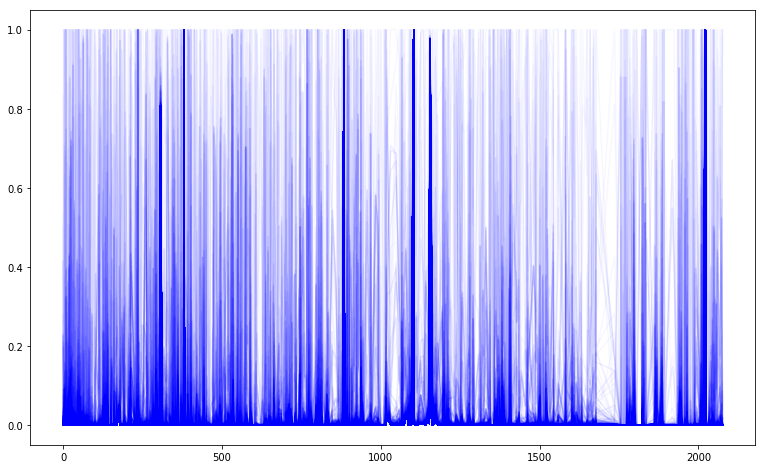

In [62]:
df_3.T.plot(figsize = (13,8), legend = False, 
                    color = 'blue', alpha = 0.03)

In [63]:
# dimensionality reduction
from sklearn.decomposition import PCA

In [64]:
X = df_3.values.copy()
X.shape

(17313, 649)

In [65]:
pca = PCA()
pca.fit(X)
X_prime = pca.transform(X)

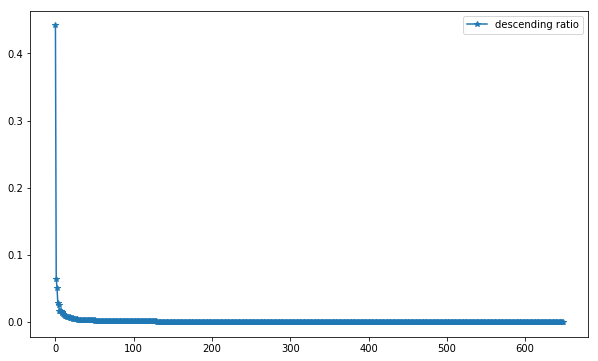

In [66]:
explained_variance_ratio = pca.explained_variance_ratio_
x = [i for i in range(len(explained_variance_ratio))]
y = []
for i in range(1,len(explained_variance_ratio)+1):
    y.append(sum(explained_variance_ratio[:i]))
plt.figure(figsize=(10,6))
#plt.plot(x,y,'o-',label='cumulative ratio')
plt.plot(x,explained_variance_ratio,'*-',label='descending ratio')
plt.legend()
plt.show()

In [70]:
pca_2 = PCA(0.9) # retain 90% of the explained information
pca_2.fit(X)
pca_2.n_components_ 
X_2 = pca_2.transform(X)

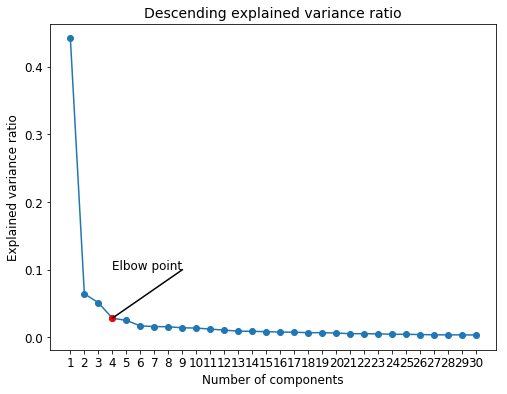

In [68]:
# 'Elbow point' method to choose the number of PCs
y2 = pca.explained_variance_ratio_
plt.figure(figsize=(8,6))
plt.plot(x[1:31],y2[:30],'o-')
plt.xticks(np.arange(1, 31, 1),fontsize=12)
plt.yticks(fontsize=12)
plt.title('Descending explained variance ratio',fontsize=14)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Explained variance ratio',fontsize=12)
plt.plot(4,y2[3],'o',color='red')
plt.plot([4,9],[y2[3],0.1],color = 'black')
plt.text(4,0.1,'Elbow point',fontsize=12)
plt.show()

In [69]:
pca_3 = PCA(n_components = 4)
pca_3.fit(X)
X_3 = pca_3.transform(X)

In [71]:
sum(pca_3.explained_variance_ratio_) # 4 PCs retain about 60% of the variances

0.586010605610353

In [72]:
# dataframe with 90% of the information
df_4 = pd.DataFrame(X_2)
df_4.head()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,-0.014552,-0.000646,-0.003195,-0.00046,0.000203,-0.000362,-0.000215,-0.001809,-0.000178,-0.00172,...,-0.000235,-0.000094,-0.000422,-0.000085,-0.00038,0.000117,0.000049,-0.000262,-0.000774,-0.000077
1,-0.014552,-0.000646,-0.003195,-0.00046,0.000203,-0.000362,-0.000215,-0.001809,-0.000178,-0.00172,...,-0.000235,-0.000094,-0.000422,-0.000085,-0.00038,0.000117,0.000049,-0.000262,-0.000774,-0.000077
2,-0.014552,-0.000646,-0.003195,-0.00046,0.000203,-0.000362,-0.000214,-0.001809,-0.000178,-0.00172,...,-0.000235,-0.000094,-0.000422,-0.000085,-0.00038,0.000117,0.000049,-0.000262,-0.000774,-0.000077
3,-0.014551,-0.000646,-0.003195,-0.00046,0.000203,-0.000362,-0.000214,-0.001809,-0.000178,-0.00172,...,-0.000235,-0.000094,-0.000422,-0.000085,-0.00038,0.000117,0.000049,-0.000262,-0.000774,-0.000077
4,-0.014552,-0.000646,-0.003195,-0.00046,0.000203,-0.000362,-0.000215,-0.001809,-0.000178,-0.00172,...,-0.000235,-0.000094,-0.000422,-0.000085,-0.00038,0.000117,0.000049,-0.000262,-0.000774,-0.000077


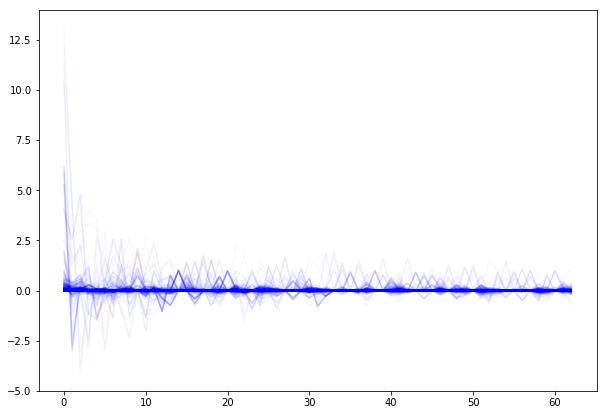

In [73]:
df_4.T.plot(figsize = (10,7), legend = False, 
                    color = 'blue', alpha = 0.03)

In [74]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [75]:
X_dbscan = X_2

db = DBSCAN(eps = 0.1, min_samples = 5).fit(X_dbscan)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_dbscan, labels))
print("Calinski harabasz score: %0.3f"
      % metrics.calinski_harabasz_score(X_dbscan, labels))
print("Davies bouldin score: %0.3f"
      % metrics.davies_bouldin_score(X_dbscan, labels))

Estimated number of clusters: 26
Estimated number of noise points: 407
Silhouette Coefficient: 0.932
Calinski harabasz score: 96.166
Davies bouldin score: 1.946


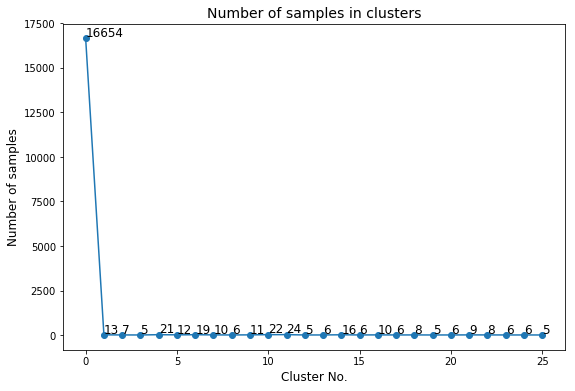

In [76]:
x = [i for i in range(n_clusters_)]
y = [list(labels).count(i) for i in x]
plt.figure(figsize = (9,6))
plt.plot(x,y,'o-')
plt.title('Number of samples in clusters',fontsize = 14)
plt.xlabel('Cluster No.',fontsize = 12)
plt.ylabel('Number of samples',fontsize = 12)
#plt.xticks(np.arange(0, 16, 1))
for i in x:
    plt.text(i,y[i]+100,str(y[i]),fontsize = 12)
plt.show()

In [77]:
from sklearn.cluster import AgglomerativeClustering

In [78]:
X_agglo_ward = X_3
clustering = AgglomerativeClustering(linkage='ward', distance_threshold = 1,compute_full_tree =True, n_clusters = None)
clustering.fit(X_agglo_ward)
labels = clustering.labels_
print (max(labels),'clusetrs')
print (list(labels).count(-1),'outliers')
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_agglo_ward, labels))
print("Calinski harabasz score: %0.3f"
      % metrics.calinski_harabasz_score(X_agglo_ward, labels))
print("Davies bouldin score: %0.3f"
      % metrics.davies_bouldin_score(X_agglo_ward, labels))

25 clusetrs
0 outliers
Silhouette Coefficient: 0.973
Calinski harabasz score: 186478.761
Davies bouldin score: 0.424


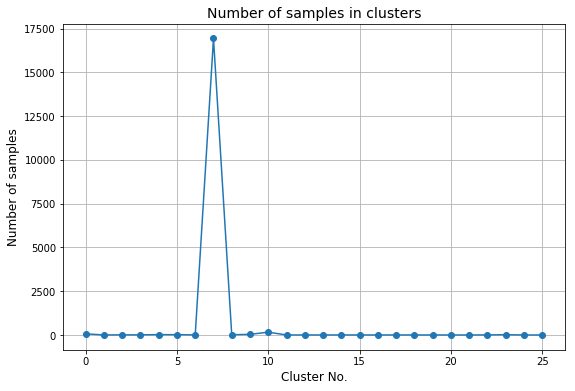

In [79]:
x = [i for i in range(max(labels)+1)]
y = [list(labels).count(i) for i in x]
plt.figure(figsize = (9,6))
plt.plot(x,y,'o-')
plt.title('Number of samples in clusters',fontsize = 14)
plt.xlabel('Cluster No.',fontsize = 12)
plt.ylabel('Number of samples',fontsize = 12)
plt.grid(True)
#plt.xticks(np.arange(0, 70, 1))
plt.show()

In [80]:
pca_4 = PCA(n_components = 3)
pca_4.fit(X)
X_4 = pca_4.transform(X)

In [81]:
x = list(X_4[:,0])
y = list(X_4[:,1])
z = list(X_4[:,2])

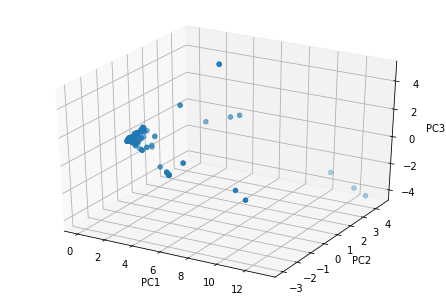

In [82]:
#3d plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, marker = 'o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

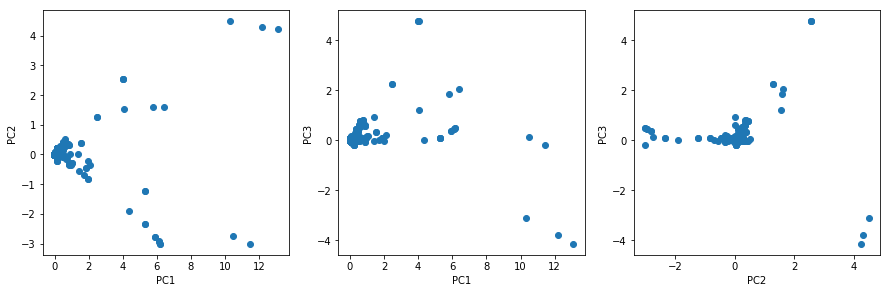

In [83]:
plt.figure(figsize=(15,4.5))
plt.subplot(131)
plt.plot(x,y,'o')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(132)
plt.plot(x,z,'o')
plt.xlabel('PC1')
plt.ylabel('PC3')

plt.subplot(133)
plt.plot(y,z,'o')
plt.xlabel('PC2')
plt.ylabel('PC3')

plt.show()
# it is more like a cluster with some outliers